# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Yashnil:Juyon/Data/DroughtCasting_DataFrame_Monthly.csv')

In [5]:
df

Year  Month  Precipitation  Reference Evapotranspiration  \
0    1979      1       1.808065                      0.883065   
1    1979      2       0.435714                      1.081250   
2    1979      3       0.377419                      1.940323   
3    1979      4       0.045000                      4.846667   
4    1979      5       0.966129                      6.054032   
5    1979      6       0.640000                      7.450000   
6    1979      7       0.347581                      7.232258   
7    1979      8       0.972581                      6.189516   
8    1979      9       0.120833                      6.370833   
9    1979     10       0.394355                      5.446774   
10   1979     11       0.591667                      1.725833   
11   1979     12       0.212903                      0.966129   
12   1980      1       1.029032                      1.467742   
13   1980      2       1.058621                      1.381897   
14   1980      3       0.470968                      2.003226   
15   1980      4       0.389167                      4.003333   
16   1980      5       1.106452                      5.471774   
17   1980      6       0.000000                      8.851667   
18   1980      7       0.487903                      7.611290   
19   1980      8       0.765323                      6.917742   
20   1980      9       0.560000                      6.468333   
21   1980     10       0.661290                      4.884677   
22   1980     11       0.310833                      2.635000   
23   1980     12       0.233065                      1.942742   
24   1981      1       0.158871                      1.673387   
25   1981      2       0.208036                      2.349107   
26   1981      3       0.609677                      3.011290   
27   1981      4       0.156667                      5.908333   
28   1981      5       1.191935                      6.058871   
29   1981      6       0.542500                      9.249167   
30   1981      7       2.707258                      6.781452   
31   1981      8       1.258871                      5.825806   
32   1981      9       1.505000                      5.384167   
33   1981     10       0.781452                      3.946774   
34   1981     11       0.165833                      2.727500   
35   1981     12       0.556452                      1.670161   
36   1982      1       0.905645                      1.117742   
37   1982      2       0.476786                      1.208036   
38   1982      3       0.637903                      2.990323   
39   1982      4       0.091667                      5.395833   
40   1982      5       0.922581                      6.058871   
41   1982      6       0.518333                      7.191667   
42   1982      7       0.932258                      7.112903   
43   1982      8       2.026613                      5.626613   
44   1982      9       1.770000                      4.965000   
45   1982     10       0.367742                      3.758065   
46   1982     11       0.192500                      1.894167   
47   1982     12       0.119355                      1.504839   
48   1983      1       0.182258                      1.440323   
49   1983      2       0.575893                      1.883929   
50   1983      3       0.726613                      2.886290   
51   1983      4       0.373333                      3.756667   
52   1983      5       0.591935                      5.766935   
53   1983      6       0.709167                      6.835000   
54   1983      7       0.966129                      7.058065   
55   1983      8       1.787903                      5.509677   
56   1983      9       0.380000                      6.606667   
57   1983     10       0.333065                      4.050000   
58   1983     11       1.324167                      1.986667   
59   1983     12       1.946774                      1.333871   
60   1984      1       0.274194         

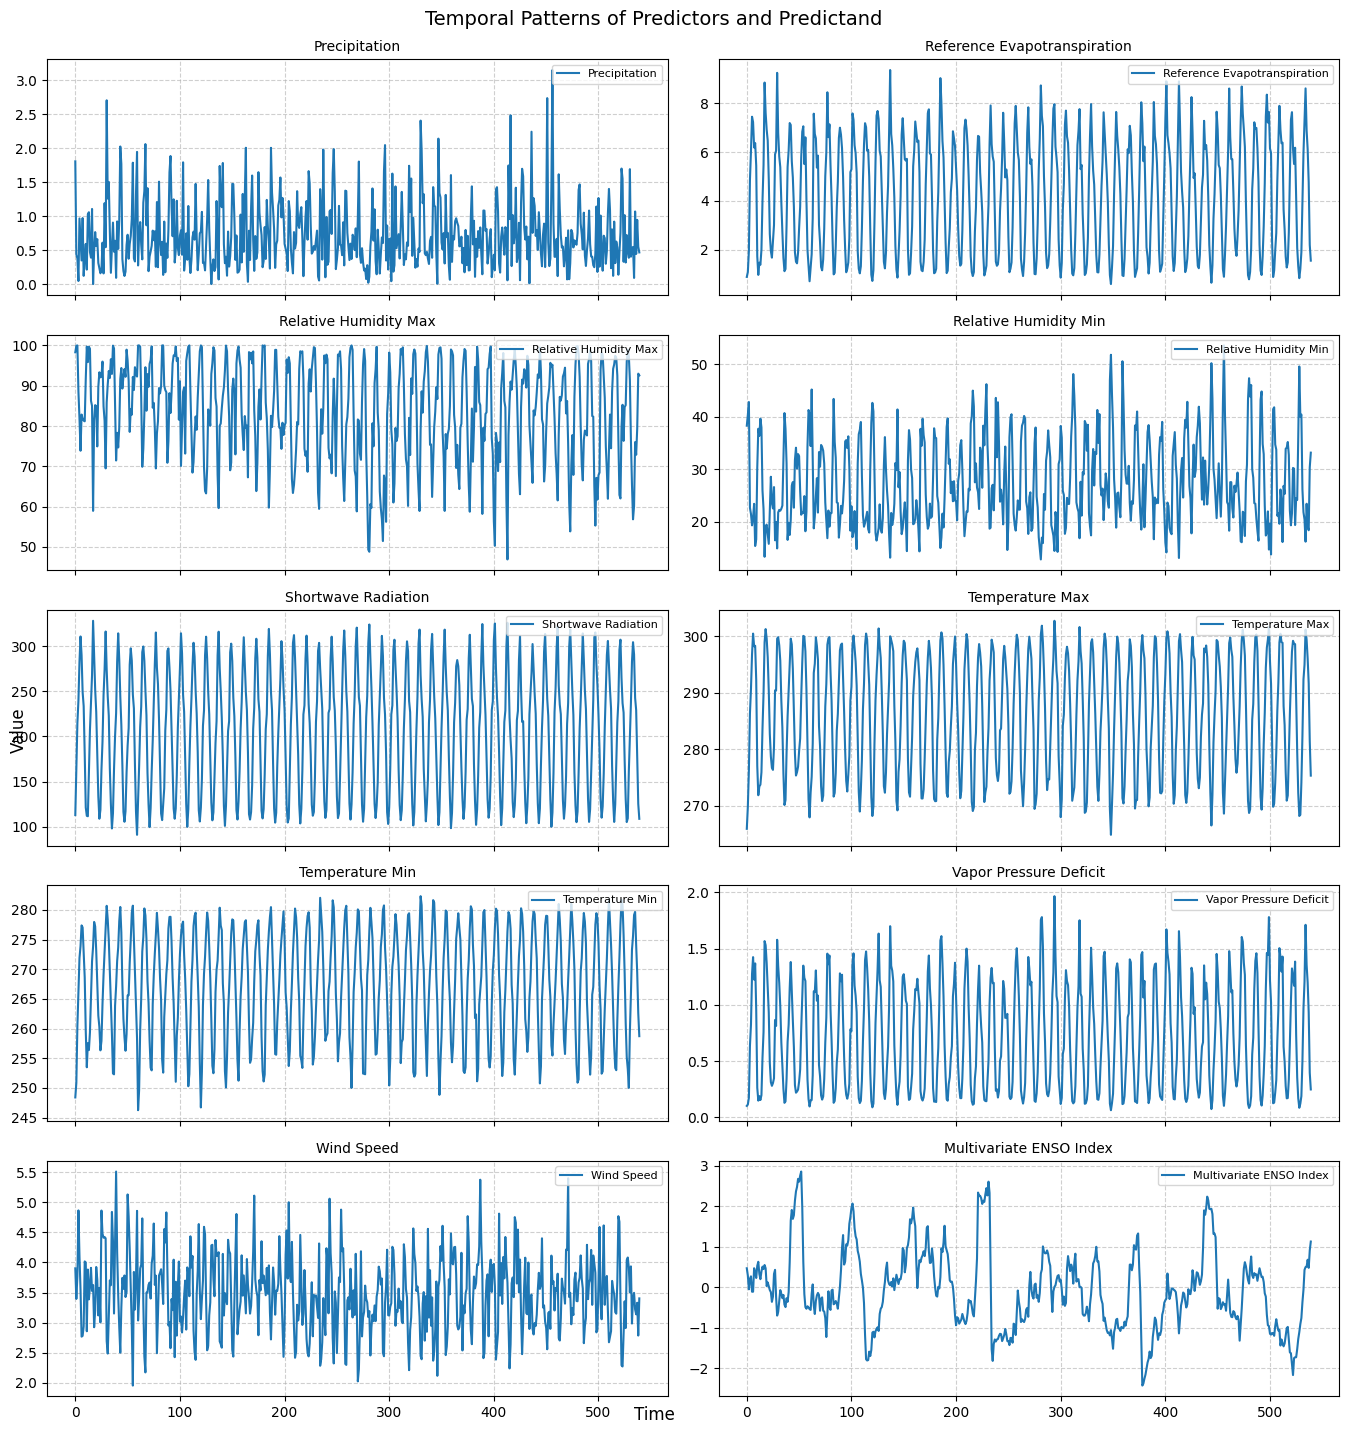

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming 'df' is your dataset
# List of critical predictors
predictors = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
]

# Add the predictand (USGS Streamflow)
predictand = 'USGS Streamflow Data'

# Create a figure with subplots
num_features = len(predictors)  # Including the predictand
cols = 2  # Number of columns for subplots
rows = (num_features + 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3), sharex=True)
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each predictor
for i, feature in enumerate(predictors):
    axes[i].plot(df.index, df[feature], label=feature, linewidth=1.5)
    axes[i].set_title(feature, fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(loc='upper right', fontsize=8)

# Remove empty subplots if any
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Add a common x-label and y-label
fig.text(0.5, 0.04, 'Time', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])
fig.suptitle('Temporal Patterns of Predictors and Predictand', fontsize=14)

plt.show()


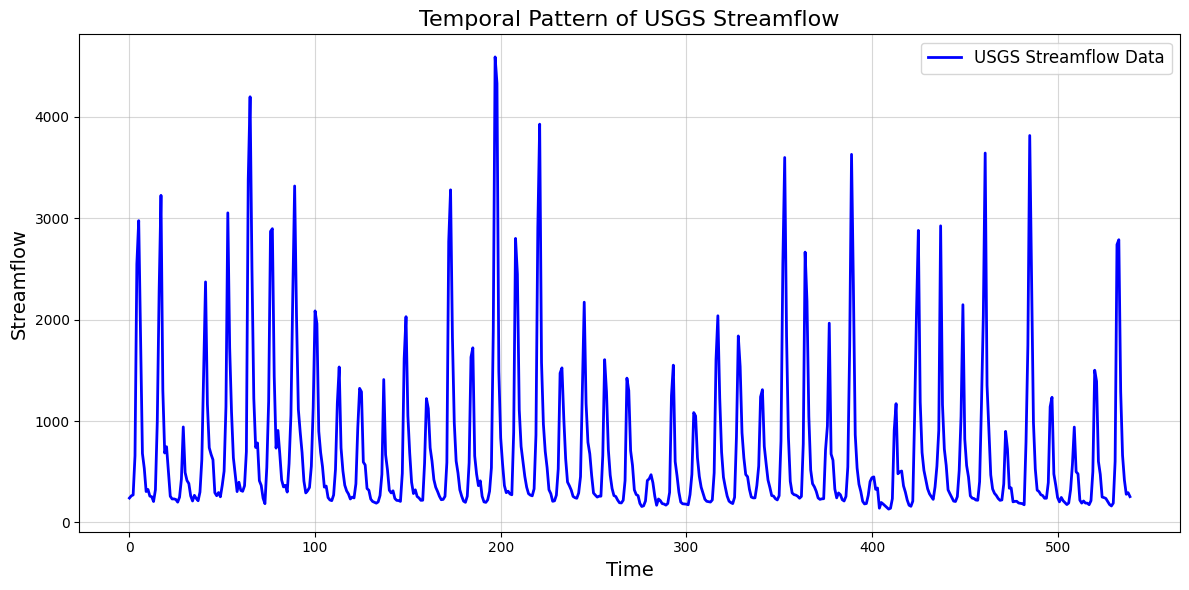

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Streamflow' is the column for the predictand
predictand_column = 'USGS Streamflow Data'

# Create the plot for the predictand
plt.figure(figsize=(12, 6))

plt.plot(df.index, df[predictand_column], color='blue', label=predictand_column, linewidth=2)
plt.title('Temporal Pattern of USGS Streamflow', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Streamflow', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


# Data Preprocessing for ARIMAX/RF Approach

In [8]:
df['Streamflow_6M_Target'] = df['USGS Streamflow Data'].shift(-6)

In [9]:
df['Time'] = (df['Year'] - 1979) * 12 + df['Month']

In [10]:
df.drop(['Year','Month'], axis=1)

Precipitation  Reference Evapotranspiration  Relative Humidity Max  \
0         1.808065                      0.883065              98.287097   
1         0.435714                      1.081250              99.910714   
2         0.377419                      1.940323              99.996774   
3         0.045000                      4.846667              88.515000   
4         0.966129                      6.054032              81.869355   
5         0.640000                      7.450000              73.872500   
6         0.347581                      7.232258              82.845161   
7         0.972581                      6.189516              81.859677   
8         0.120833                      6.370833              81.363333   
9         0.394355                      5.446774              81.173387   
10        0.591667                      1.725833              91.699167   
11        0.212903                      0.966129              99.709677   
12        1.029032                      1.467742              95.855645   
13        1.058621                      1.381897              99.672414   
14        0.470968                      2.003226              99.199194   
15        0.389167                      4.003333              86.280000   
16        1.106452                      5.471774              85.005645   
17        0.000000                      8.851667              58.954167   
18        0.487903                      7.611290              81.407258   
19        0.765323                      6.917742              85.185484   
20        0.560000                      6.468333              84.917500   
21        0.661290                      4.884677              74.945968   
22        0.310833                      2.635000              89.700833   
23        0.233065                      1.942742              93.327419   
24        0.158871                      1.673387              92.078226   
25        0.208036                      2.349107              92.300000   
26        0.609677                      3.011290              95.990323   
27        0.156667                      5.908333              84.891667   
28        1.191935                      6.058871              81.287903   
29        0.542500                      9.249167              69.493333   
30        2.707258                      6.781452              85.885484   
31        1.258871                      5.825806              90.315323   
32        1.505000                      5.384167              93.655000   
33        0.781452                      3.946774              91.921774   
34        0.165833                      2.727500              96.570833   
35        0.556452                      1.670161              92.929839   
36        0.905645                      1.117742              99.948387   
37        0.476786                      1.208036              99.251786   
38        0.637903                      2.990323              84.821774   
39        0.091667                      5.395833              71.450833   
40        0.922581                      6.058871              78.322581   
41        0.518333                      7.191667              74.680833   
42        0.932258                      7.112903              79.573387   
43        2.026613                      5.626613              91.695161   
44        1.770000                      4.965000              94.394167   
45        0.367742                      3.758065              89.296774   
46        0.192500                      1.894167              92.284167   
47        0.119355                      1.504839              94.113710   
48        0.182258                      1.440323              92.208871   
49        0.575893                      1.883929              98.953571   
50        0.726613                      2.886290              96.259677   
51        0.373333                      3.756667              91.191667   
52        0.591935            

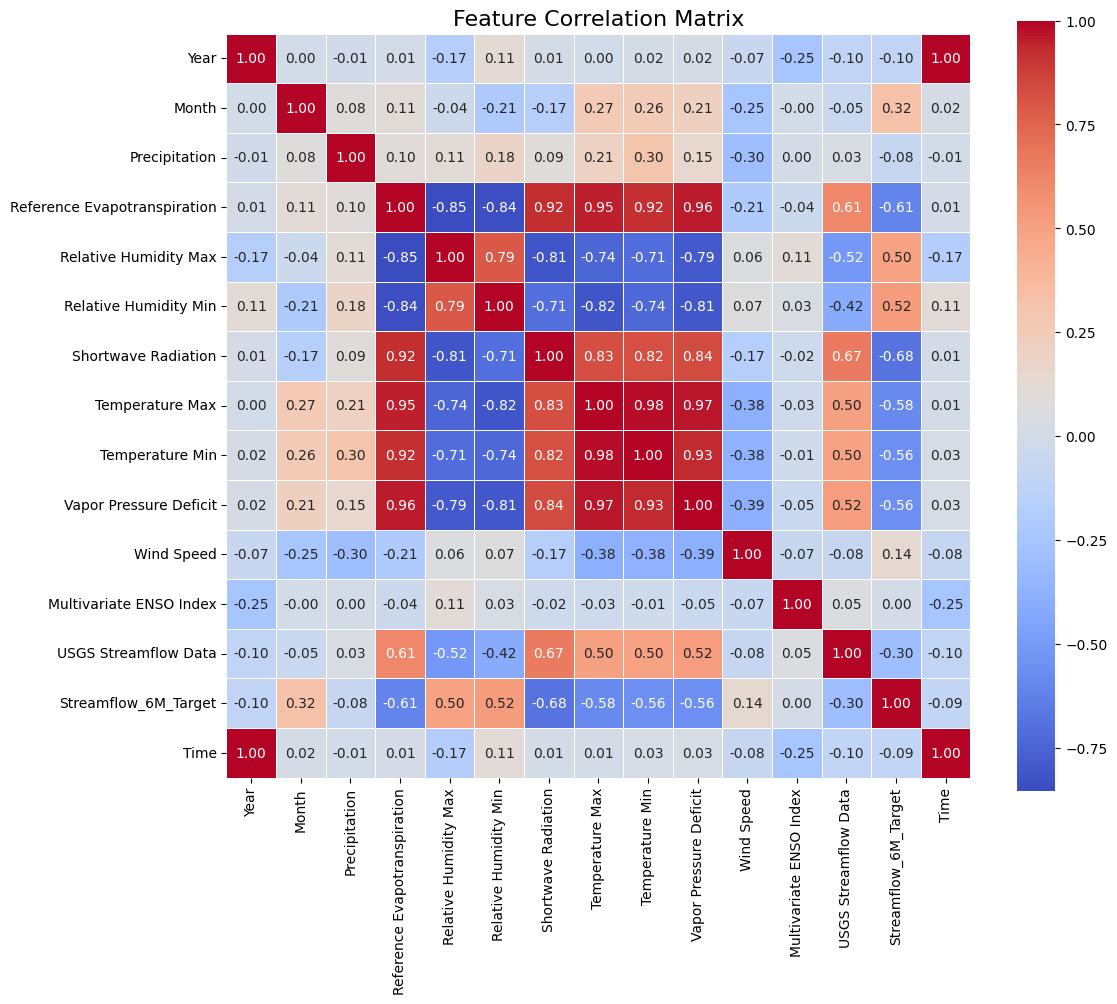

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    fmt=".2f",   # Format for correlation values
    cmap="coolwarm",  # Color map
    annot = True,
    cbar=True,   # Display color bar
    square=True, # Square layout
    linewidths=0.5  # Add space between cells
)

# Add title to the heatmap
plt.title("Feature Correlation Matrix", fontsize=16)

# Show the plot
plt.show()


In [12]:
# Step 2: Add lagged features for predictors up to 6 months
predictor_columns = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
]

# Create lagged features for each predictor
for lag in range(1, 7):  # Lags from 1 to 6 months
    for col in predictor_columns:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

In [13]:
# Step 3: Drop rows with NaN values introduced by shifting and lagging
df = df.dropna()

In [14]:
df

Year  Month  Precipitation  Reference Evapotranspiration  \
6    1979      7       0.347581                      7.232258   
7    1979      8       0.972581                      6.189516   
8    1979      9       0.120833                      6.370833   
9    1979     10       0.394355                      5.446774   
10   1979     11       0.591667                      1.725833   
11   1979     12       0.212903                      0.966129   
12   1980      1       1.029032                      1.467742   
13   1980      2       1.058621                      1.381897   
14   1980      3       0.470968                      2.003226   
15   1980      4       0.389167                      4.003333   
16   1980      5       1.106452                      5.471774   
17   1980      6       0.000000                      8.851667   
18   1980      7       0.487903                      7.611290   
19   1980      8       0.765323                      6.917742   
20   1980      9       0.560000                      6.468333   
21   1980     10       0.661290                      4.884677   
22   1980     11       0.310833                      2.635000   
23   1980     12       0.233065                      1.942742   
24   1981      1       0.158871                      1.673387   
25   1981      2       0.208036                      2.349107   
26   1981      3       0.609677                      3.011290   
27   1981      4       0.156667                      5.908333   
28   1981      5       1.191935                      6.058871   
29   1981      6       0.542500                      9.249167   
30   1981      7       2.707258                      6.781452   
31   1981      8       1.258871                      5.825806   
32   1981      9       1.505000                      5.384167   
33   1981     10       0.781452                      3.946774   
34   1981     11       0.165833                      2.727500   
35   1981     12       0.556452                      1.670161   
36   1982      1       0.905645                      1.117742   
37   1982      2       0.476786                      1.208036   
38   1982      3       0.637903                      2.990323   
39   1982      4       0.091667                      5.395833   
40   1982      5       0.922581                      6.058871   
41   1982      6       0.518333                      7.191667   
42   1982      7       0.932258                      7.112903   
43   1982      8       2.026613                      5.626613   
44   1982      9       1.770000                      4.965000   
45   1982     10       0.367742                      3.758065   
46   1982     11       0.192500                      1.894167   
47   1982     12       0.119355                      1.504839   
48   1983      1       0.182258                      1.440323   
49   1983      2       0.575893                      1.883929   
50   1983      3       0.726613                      2.886290   
51   1983      4       0.373333                      3.756667   
52   1983      5       0.591935                      5.766935   
53   1983      6       0.709167                      6.835000   
54   1983      7       0.966129                      7.058065   
55   1983      8       1.787903                      5.509677   
56   1983      9       0.380000                      6.606667   
57   1983     10       0.333065                      4.050000   
58   1983     11       1.324167                      1.986667   
59   1983     12       1.946774                      1.333871   
60   1984      1       0.274194                      0.705645   
61   1984      2       0.746552                      1.262931   
62   1984      3       0.912903                      1.813710   
63   1984      4       0.576667                      3.286667   
64   1984      5       0.363710                      7.575000   
65   1984      6       1.199167                      6.741667   
66   1984      7       1.370161         

In [15]:
import numpy as np
# Step 4: Add sinusoidal transformations for month to capture seasonality
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

<ipython-input-15-16fad0a05695>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
<ipython-input-15-16fad0a05695>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)


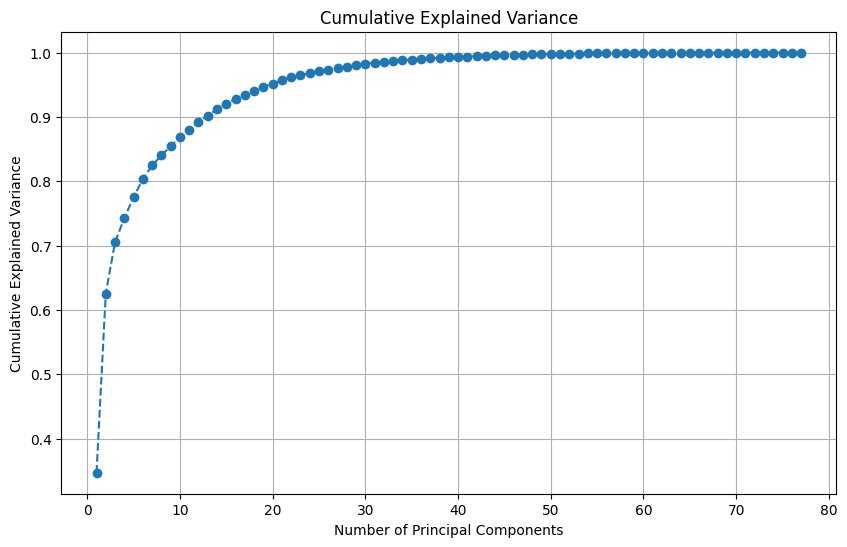

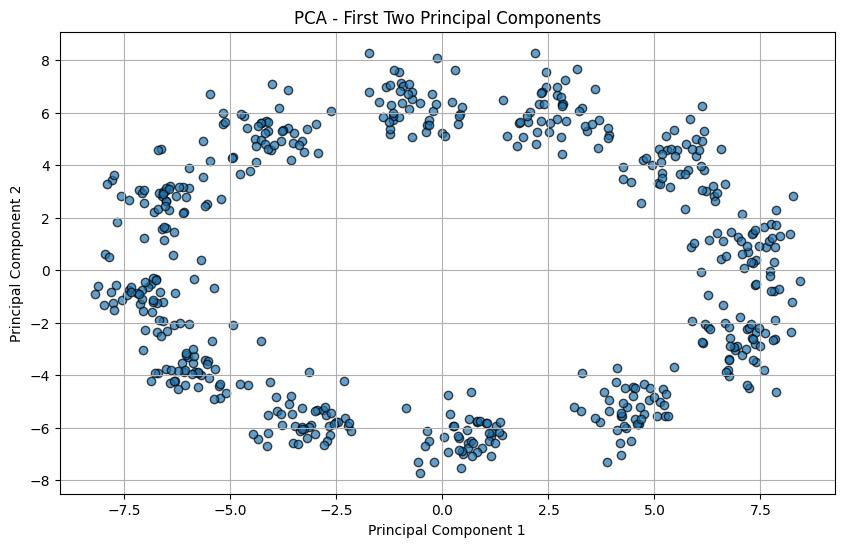

Explained Variance Ratio by Component:
PC1: 0.3470
PC2: 0.2786
PC3: 0.0798
PC4: 0.0375
PC5: 0.0325
PC6: 0.0286
PC7: 0.0208
PC8: 0.0156
PC9: 0.0146
PC10: 0.0136
PC11: 0.0119
PC12: 0.0113
PC13: 0.0105
PC14: 0.0100
PC15: 0.0084
PC16: 0.0076
PC17: 0.0068
PC18: 0.0062
PC19: 0.0056
PC20: 0.0054
PC21: 0.0051
PC22: 0.0045
PC23: 0.0034
PC24: 0.0030
PC25: 0.0029
PC26: 0.0027
PC27: 0.0024
PC28: 0.0024
PC29: 0.0022
PC30: 0.0020
PC31: 0.0017
PC32: 0.0015
PC33: 0.0014
PC34: 0.0011
PC35: 0.0010
PC36: 0.0009
PC37: 0.0008
PC38: 0.0008
PC39: 0.0007
PC40: 0.0007
PC41: 0.0006
PC42: 0.0006
PC43: 0.0005
PC44: 0.0005
PC45: 0.0005
PC46: 0.0004
PC47: 0.0004
PC48: 0.0004
PC49: 0.0003
PC50: 0.0003
PC51: 0.0003
PC52: 0.0002
PC53: 0.0002
PC54: 0.0002
PC55: 0.0002
PC56: 0.0001
PC57: 0.0001
PC58: 0.0001
PC59: 0.0001
PC60: 0.0001
PC61: 0.0000
PC62: 0.0000
PC63: 0.0000
PC64: 0.0000
PC65: 0.0000
PC66: 0.0000
PC67: 0.0000
PC68: 0.0000
PC69: 0.0000
PC70: 0.0000
PC71: 0.0000
PC72: 0.0000
PC73: 0.0000
PC74: 0.0000
PC75: 0.

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocess the data (e.g., standardize it)
# Assuming the dataset does not have a target column, or you can drop it as needed
features = df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
n_components = min(df.shape[0], df.shape[1])  # Maximum components = min(samples, features)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# PCA grid visualization (2D scatter plot for the first two components)
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7, edgecolor='k')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Print the explained variance ratio for each component
print("Explained Variance Ratio by Component:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {variance:.4f}")

# If you want to save the PCA results to a DataFrame
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
print(principal_df.head())


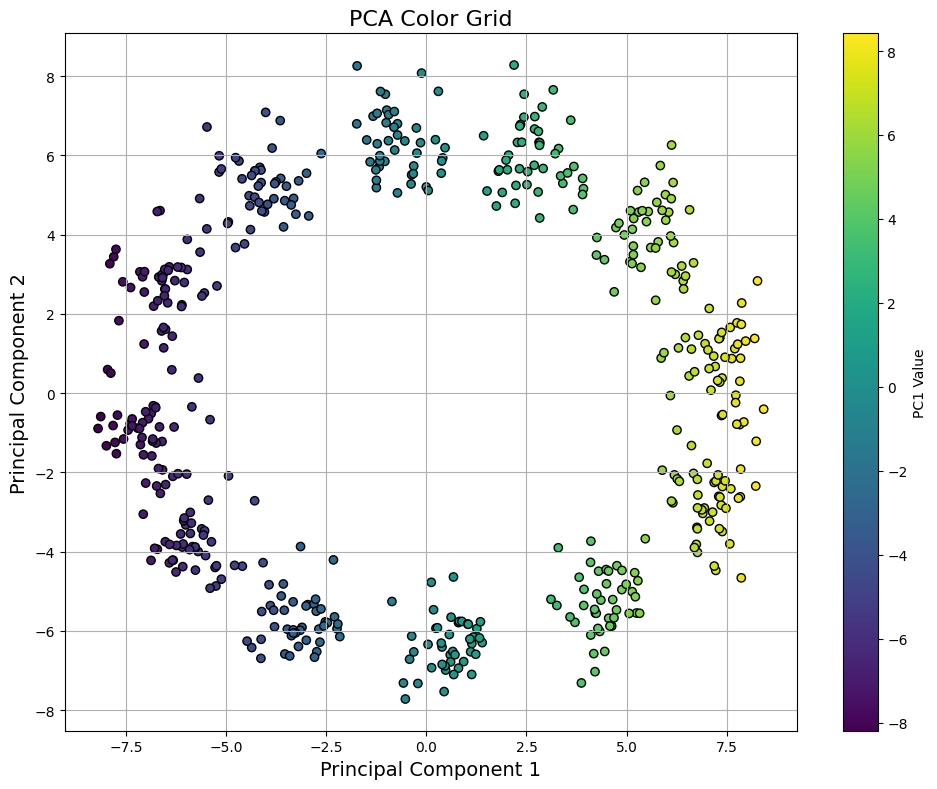

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a color grid based on the first principal component
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
colors = pc1  # Using the first principal component for coloring

# Create the PCA grid plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pc1, pc2, c=colors, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='PC1 Value')
plt.title('PCA Color Grid', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


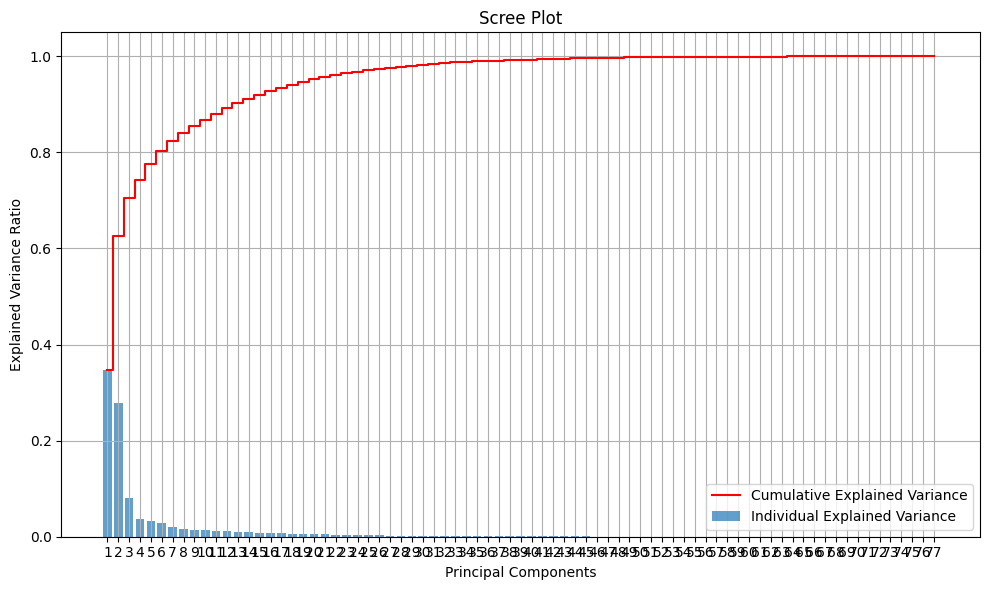

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


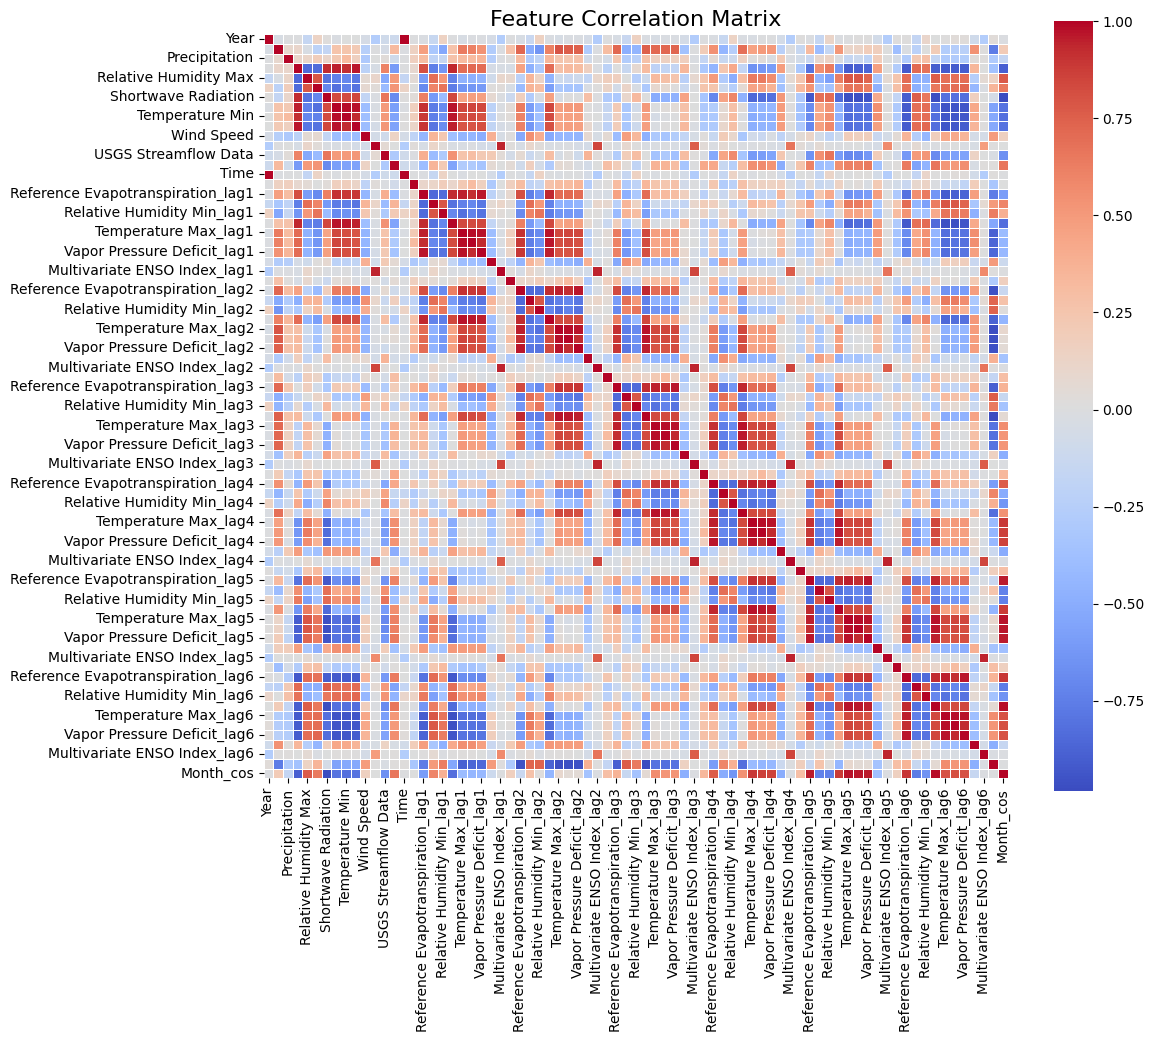

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    fmt=".2f",   # Format for correlation values
    cmap="coolwarm",  # Color map
    cbar=True,   # Display color bar
    square=True, # Square layout
    linewidths=0.5  # Add space between cells
)

# Add title to the heatmap
plt.title("Feature Correlation Matrix", fontsize=16)

# Show the plot
plt.show()


In [20]:
# List of all exogenous features with lags from 1 to 6
exogenous_features = [
    f'Precipitation_lag{n}' for n in range(1, 7)
] + [
    f'Reference Evapotranspiration_lag{n}' for n in range(1, 7)
] + [
    f'Relative Humidity Max_lag{n}' for n in range(1, 7)
] + [
    f'Relative Humidity Min_lag{n}' for n in range(1, 7)
] + [
    f'Shortwave Radiation_lag{n}' for n in range(1, 7)
] + [
    f'Temperature Max_lag{n}' for n in range(1, 7)
] + [
    f'Temperature Min_lag{n}' for n in range(1, 7)
] + [
    f'Vapor Pressure Deficit_lag{n}' for n in range(1, 7)
] + [
    f'Wind Speed_lag{n}' for n in range(1, 7)
] + [
    f'Multivariate ENSO Index_lag{n}' for n in range(1, 7)
] + [
    'Month_sin', 'Month_cos'
]

# Display the list of exogenous features
print(exogenous_features)


['Precipitation_lag1', 'Precipitation_lag2', 'Precipitation_lag3', 'Precipitation_lag4', 'Precipitation_lag5', 'Precipitation_lag6', 'Reference Evapotranspiration_lag1', 'Reference Evapotranspiration_lag2', 'Reference Evapotranspiration_lag3', 'Reference Evapotranspiration_lag4', 'Reference Evapotranspiration_lag5', 'Reference Evapotranspiration_lag6', 'Relative Humidity Max_lag1', 'Relative Humidity Max_lag2', 'Relative Humidity Max_lag3', 'Relative Humidity Max_lag4', 'Relative Humidity Max_lag5', 'Relative Humidity Max_lag6', 'Relative Humidity Min_lag1', 'Relative Humidity Min_lag2', 'Relative Humidity Min_lag3', 'Relative Humidity Min_lag4', 'Relative Humidity Min_lag5', 'Relative Humidity Min_lag6', 'Shortwave Radiation_lag1', 'Shortwave Radiation_lag2', 'Shortwave Radiation_lag3', 'Shortwave Radiation_lag4', 'Shortwave Radiation_lag5', 'Shortwave Radiation_lag6', 'Temperature Max_lag1', 'Temperature Max_lag2', 'Temperature Max_lag3', 'Temperature Max_lag4', 'Temperature Max_lag5

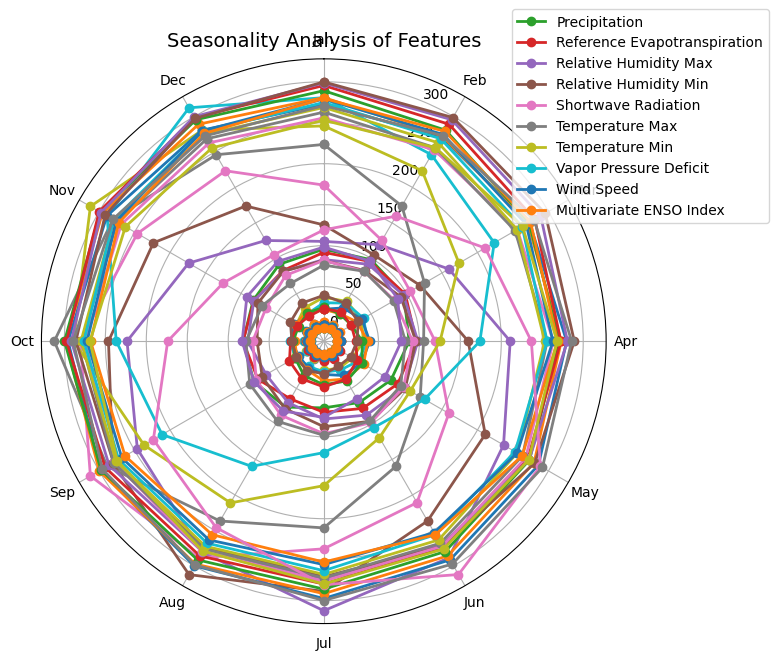

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assuming 'df' is your dataset with 'Month', 'Precipitation', 'Temperature Max', etc.

# Define the features and months
features = exogenous_features + predictor_columns
months = np.arange(1, 13)  # 1 to 12 representing months

# Aggregate data by month
monthly_averages = df.groupby('Month')[features].mean()

# Convert months to angles (radians)
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)  # 12 months evenly spaced

# Plot each feature on a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Loop through features, but only add legend entries for predictor_columns
for feature in features:
    data = monthly_averages[feature].values
    # Close the circle by appending the first value to the end
    data = np.append(data, data[0])
    angles_full = np.append(angles, angles[0])

    # Plot the data
    if feature in predictor_columns:  # Only label if the feature is in predictor_columns
        ax.plot(angles_full, data, label=feature, marker='o', linewidth=2)
    else:
        ax.plot(angles_full, data, marker='o', linewidth=2)

# Customize plot
ax.set_theta_zero_location('N')  # Set 0 degrees at the top (north)
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_xticks(angles)  # Set tick positions
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names
ax.set_title('Seasonality Analysis of Features', va='bottom', fontsize=14)

# Add legend only for predictor_columns
handles, labels = ax.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in predictor_columns]
filtered_handles, filtered_labels = zip(*filtered_handles_labels) if filtered_handles_labels else ([], [])
ax.legend(filtered_handles, filtered_labels, loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


In [22]:
# Split the data into training and testing sets based on Year
train_size = int(len(df) * 0.9)
train = df[:train_size]
test = df[train_size:]

# Define target variable (streamflow shifted by 6 months)
y_train = train['Streamflow_6M_Target']
y_test = test['Streamflow_6M_Target']

# Exogenous variables
X_train = train[exogenous_features]
X_test = test[exogenous_features]

# Display the shapes of the datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(475, 62), y_train=(475,)
Testing set shape: X_test=(53, 62), y_test=(53,)


In [23]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.1 MB/s eta 0:00:00


In [24]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Define predictors and target
features = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed',
    'Multivariate ENSO Index', 'Month_sin', 'Month_cos'
] + [
    f'{col}_lag{n}' for col in [
        'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
        'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
        'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
    ] for n in range(1, 7)
]

target = 'Streamflow_6M_Target'

# Select predictors and target
X = df[features]
y = df[target]

# Normalize predictors and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
split_index = int(len(X) * 0.9)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]


# ARIMAX Approach

In [34]:
from pmdarima import auto_arima

# Use auto_arima to find the best parameters
arima_model = auto_arima(
    y_train,               # Target variable
    exogenous=X_train,     # Exogenous variables
    seasonal=False,        # No seasonality for standard ARIMAX
    stepwise=True,         # Stepwise parameter selection
    trace=True,            # Display the process
    error_action='ignore', # Ignore errors and continue
    suppress_warnings=True # Suppress warnings
)

# Print the best ARIMAX parameters
print("Optimal ARIMAX order (p, d, q):", arima_model.order)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-656.737, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-108.273, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-587.087, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-490.363, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-658.449, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-619.178, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-658.937, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-658.045, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-646.803, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-705.321, Time=2.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-634.751, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-617.004, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-718.596, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-719.145, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-717.828, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-717.928, Time=0.62 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 7.082 seconds
Optimal ARIMAX order (p, d, q): (2, 0, 0)


In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMAX model
arimax_model = SARIMAX(
    y_train,              # Target variable
    exog=X_train,         # Exogenous variables
    order=(2, 0, 0),      # Optimal ARIMAX order
    enforce_stationarity=False,
    enforce_invertibility=False
)

arimax_result = arimax_model.fit()

# Print the model summary
print(arimax_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  475
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 542.758
Date:                Mon, 17 Feb 2025   AIC                           -935.516
Time:                        20:49:49   BIC                           -623.584
Sample:                             0   HQIC                          -812.826
                                - 475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0987      0.054     -1.825      0.068      -0.205       0.007
x2             0.0737      0.369      0.200      0.841      -0.648       0.796
x3             0.0603      0.089      0.681      0.4

Test RMSE: 0.07946305667590922
Test MAE: 0.05687501868332395


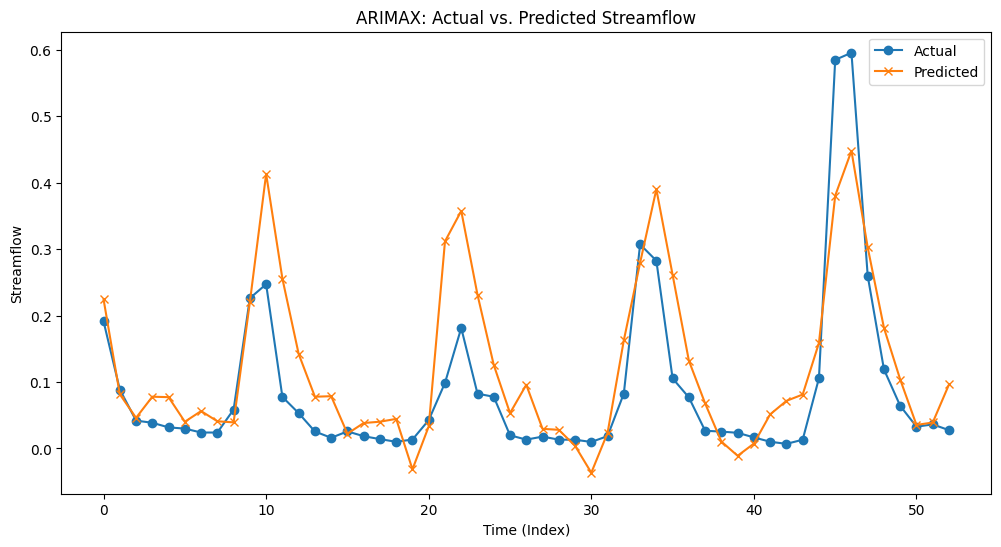

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Ensure the test set index is properly aligned for forecasting
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Forecast on the test set
forecast = arimax_result.get_forecast(steps=len(X_test), exog=X_test)

# Extract predicted values
predicted = forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted))
mae = mean_absolute_error(y_test, predicted)
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, predicted, label='Predicted', marker='x')
plt.legend()
plt.title('ARIMAX: Actual vs. Predicted Streamflow')
plt.xlabel('Time (Index)')
plt.ylabel('Streamflow')
plt.show()


In [39]:
# Convert predicted to a Pandas Series
predicted = pd.Series(predicted)

# Reset the index of y_test and predicted (since they are now Pandas objects)
y_test = y_test.reset_index(drop=True)
predicted = predicted.reset_index(drop=True)


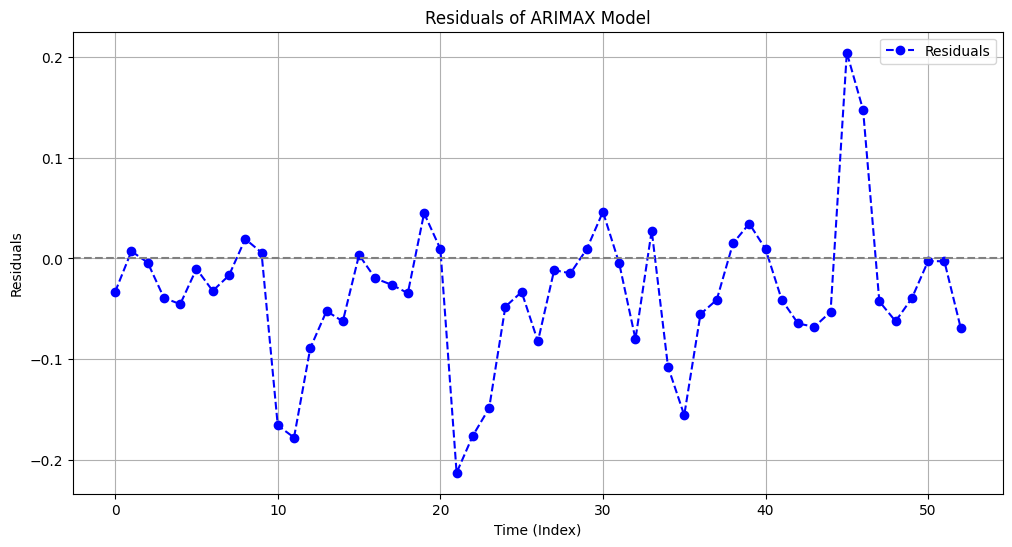

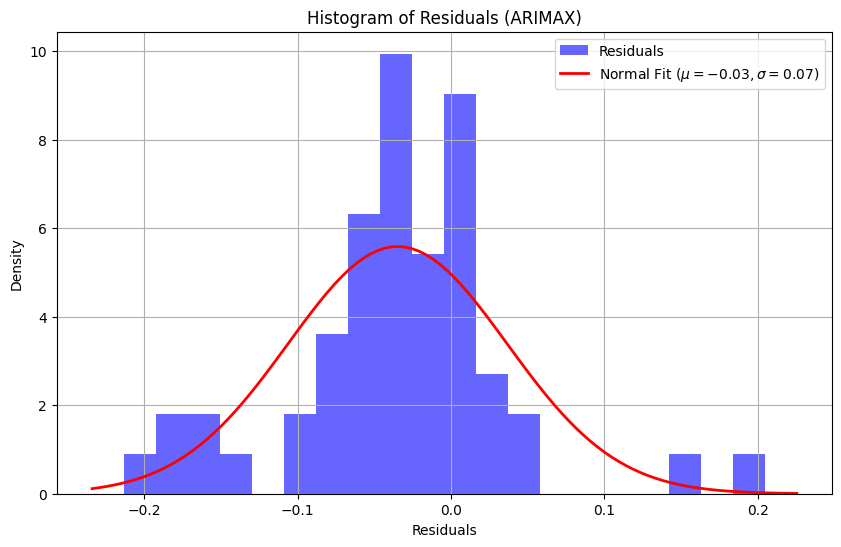

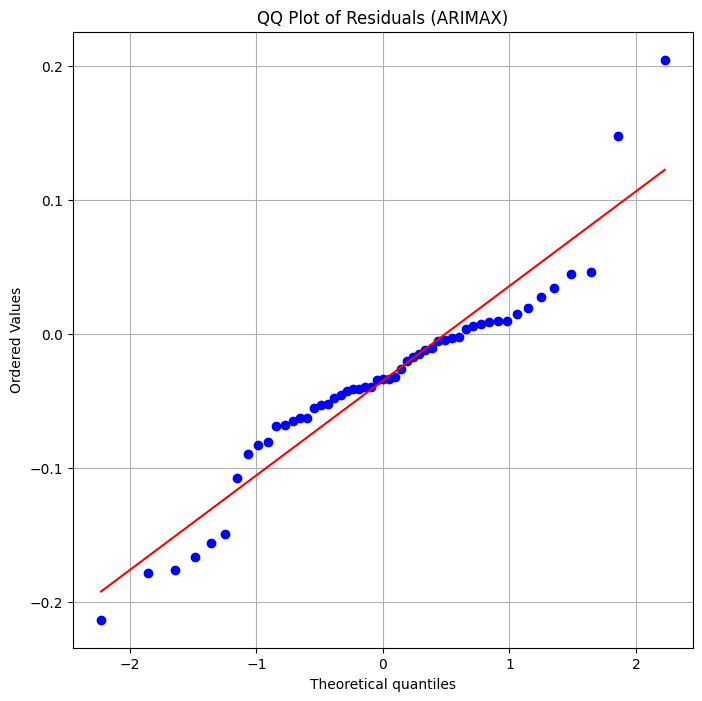

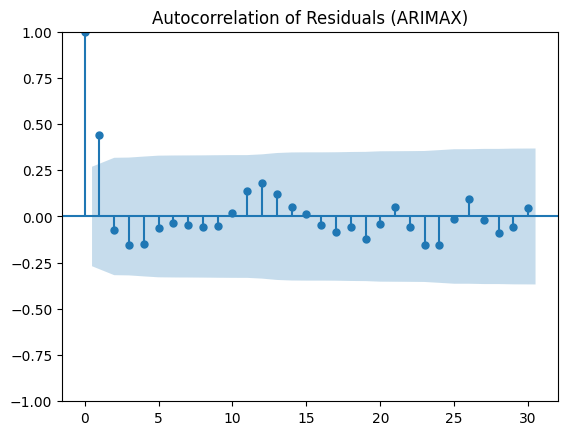

In [40]:
# Residual Analysis for ARIMAX
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from statsmodels.graphics.tsaplots import plot_acf

# Calculate residuals for ARIMAX model
residuals_arimax = y_test - predicted

# 1. Residuals Plot
plt.figure(figsize=(12, 6))
plt.plot(residuals_arimax, label="Residuals", color="blue", marker="o", linestyle="--")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals of ARIMAX Model")
plt.xlabel("Time (Index)")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# 2. Histogram of Residuals with Normal Fit
plt.figure(figsize=(10, 6))
plt.hist(residuals_arimax, bins=20, density=True, alpha=0.6, color="blue", label="Residuals")
mu, std = norm.fit(residuals_arimax)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)")
plt.title("Histogram of Residuals (ARIMAX)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# 3. QQ Plot
plt.figure(figsize=(8, 8))
probplot(residuals_arimax, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (ARIMAX)")
plt.grid()
plt.show()

# 4. Autocorrelation Plot
plot_acf(residuals_arimax, lags=30, alpha=0.05)
plt.title("Autocorrelation of Residuals (ARIMAX)")
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Number of splits for time-series cross-validation
n_splits = 5

# Calculate fold size for test data
test_size = len(X_train) // (n_splits + 1)

# Store metrics for each fold
rmse_scores = []
mae_scores = []

for fold in range(1, n_splits + 1):
    # Define train and test sets for the current fold
    train_end = test_size * fold
    X_train_fold = X_train[:train_end]
    y_train_fold = y_train[:train_end]
    X_test_fold = X_train[train_end : train_end + test_size]
    y_test_fold = y_train[train_end : train_end + test_size]

    # Fit ARIMAX model on the current training fold
    arimax_model = SARIMAX(
        y_train_fold,              # Target variable
        exog=X_train_fold,         # Exogenous variables
        order=(2, 0, 0),           # Optimal ARIMAX order (adjust if necessary)
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Make predictions for the current test fold
    forecast = arimax_model.get_forecast(steps=len(X_test_fold), exog=X_test_fold)
    y_pred_fold = forecast.predicted_mean

    # Calculate RMSE and MAE for the current fold
    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    mae = mean_absolute_error(y_test_fold, y_pred_fold)

    # Append metrics
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"Fold {fold}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Print average metrics across all folds
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold 1: RMSE = 0.2200, MAE = 0.1882


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold 2: RMSE = 0.1711, MAE = 0.1178


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold 3: RMSE = 0.1326, MAE = 0.0942


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold 4: RMSE = 0.1099, MAE = 0.0709
Fold 5: RMSE = 0.1052, MAE = 0.0716
Average RMSE: 0.1478
Average MAE: 0.1085


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
# Extract coefficients and p-values
coefficients = arimax_result.params
p_values = arimax_result.pvalues

# Filter significant features (p-value <= 0.05)
significant_features = coefficients[p_values <= 0.1]
significant_features = significant_features.drop(['ar.L1', 'ar.L2', 'sigma2'])  # Exclude non-exogenous terms

# Plot the top features
significant_features.sort_values(ascending=False).head(10).plot(kind='barh', title='Feature Importance (ARIMAX)')


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
print(coefficients.index)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the model's coefficients for exogenous variables
coefficients = arimax_result.params
exogenous_features = [feature for feature in X_train.columns if feature in coefficients.index]

# Filter for exogenous variable coefficients
exogenous_coefficients = coefficients.loc[exogenous_features]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': exogenous_coefficients.index,
    'Coefficient': exogenous_coefficients.values
})

# Sort by the absolute value of the coefficients
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 20 features
top_20_features = importance_df.head(20)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - ARIMAX')
plt.gca().invert_yaxis()  # Reverse the order of features for better readability
plt.tight_layout()
plt.show()

# Display the top 20 features
print(top_20_features)


In [ ]:
# Compute residuals for ARIMAX model (training data)
arimax_residuals = arimax_result.resid

# Compute cumulative MAE and MSE for ARIMAX
cumulative_arimax_mae = np.cumsum(np.abs(arimax_residuals)) / np.arange(1, len(arimax_residuals) + 1)
cumulative_arimax_mse = np.cumsum(arimax_residuals ** 2) / np.arange(1, len(arimax_residuals) + 1)

# Plot cumulative MSE for ARIMAX
plt.figure(figsize=(12, 6))
plt.plot(cumulative_arimax_mse, label='Cumulative MSE', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MSE', fontsize=14)
plt.title('Cumulative Mean Squared Error (MSE) Over Samples (ARIMAX)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot cumulative MAE for ARIMAX
plt.figure(figsize=(12, 6))
plt.plot(cumulative_arimax_mae, label='Cumulative MAE', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MAE', fontsize=14)
plt.title('Cumulative Mean Absolute Error (MAE) Over Samples (ARIMAX)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [ ]:
# Extract coefficients and p-values for exogenous variables
exog_summary = arimax_result.summary().tables[1]
print(exog_summary)  # Review coefficients and p-values

# Use this information to identify insignificant predictors

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression model for feature ranking
lr_model = LinearRegression()

# Recursive Feature Elimination with Cross-Validation (RFECV)
selector = RFECV(estimator=lr_model, step=1, cv=5, scoring='neg_mean_squared_error')  # Use RMSE as scoring metric
selector = selector.fit(X_train, y_train)

# Get rankings and selected features
rankings = selector.ranking_  # Ranking of features (1 = most important)
selected_features = X_train.columns[selector.support_]  # Only features with rank 1

# Print results
print("Selected Features:", selected_features)
print("Feature Rankings:", rankings)


In [ ]:
# Filter X_train and X_test to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the ARIMAX model using the reduced feature set
from statsmodels.tsa.statespace.sarimax import SARIMAX

arimax_model_refined = SARIMAX(
    y_train,
    exog=X_train_selected,
    order=(1, 1, 1),  # Use the best ARIMAX order from previous steps
    enforce_stationarity=False,
    enforce_invertibility=False
)

arimax_result_refined = arimax_model_refined.fit()

# Print summary of the refined model
print(arimax_result_refined.summary())


In [ ]:
baseline_prediction = arimax_model.predict(X_test).mean()

# Define key features for sensitivity analysis
key_features = ['Precipitation', 'Temperature Max', 'Vapor Pressure Deficit']  # Example features

# Define the percentage changes for perturbation
perturbation_levels = [-20, -10, 10, 20]

# DataFrame to store sensitivity results
sensitivity_results = pd.DataFrame(index=key_features, columns=perturbation_levels)

for feature in key_features:
    feature_idx = list(X_test.columns).index(feature)
    for perturbation in perturbation_levels:
        # Create a copy of the test data
        X_test_perturbed = X_test.copy()
        # Apply perturbation to the feature
        X_test_perturbed.iloc[:, feature_idx] *= (1 + perturbation / 100)
        # Calculate new prediction
        perturbed_prediction = model.predict(X_test_perturbed).mean()
        # Store the absolute difference from baseline
        sensitivity_results.loc[feature, perturbation] = abs(perturbed_prediction - baseline_prediction)

# Plot the Tornado Diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Sort features by sensitivity (largest impact at the top)
sensitivity_results['Max Impact'] = sensitivity_results.abs().max(axis=1)
sensitivity_results = sensitivity_results.sort_values(by='Max Impact', ascending=False).drop(columns='Max Impact')

# Plot bars for each feature and perturbation
bar_width = 0.4  # Width of each bar
y_positions = np.arange(len(key_features))  # Y positions for bars
for i, perturbation in enumerate(perturbation_levels):
    ax.barh(
        y_positions + (i - len(perturbation_levels) / 2) * bar_width,
        sensitivity_results[perturbation],
        height=bar_width,
        label=f'{perturbation:+}%'
    )

# Customize plot
ax.set_yticks(y_positions)
ax.set_yticklabels(sensitivity_results.index)
ax.set_xlabel('Change in Prediction')
ax.set_title('Tornado Diagram for Sensitivity Analysis')
ax.legend(title='Perturbation Levels', loc='lower right')

plt.tight_layout()
plt.show()


# LSTM Approach

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define features and target
features = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed',
    'Multivariate ENSO Index', 'Month_sin', 'Month_cos'
] + [
    f'{col}_lag{n}' for col in [
        'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
        'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
        'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
    ] for n in range(1, 7)
]

target = 'Streamflow_6M_Target'

# Select predictors and target
df_selected = df[features + [target]]

# Normalize the features and target
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features + [target])

# Define look-back period (e.g., 6 months)
look_back = 6

# Function to create sequences
def create_sequences(data, target_col, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, :-1])  # Features
        y.append(data[i+look_back, -1])    # Target
    return np.array(X), np.array(y)

# Convert data to supervised learning format
data = df_scaled.values
X, y = create_sequences(data, target_col=-1, look_back=look_back)


In [45]:
# Split data into training and testing sets
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set: X={X_test.shape}, y={y_test.shape}")

Training set: X=(469, 6, 72), y=(469,)
Testing set: X=(53, 6, 72), y=(53,)


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(256, activation='relu', input_shape=(look_back, X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0347 - mae: 0.1353 - val_loss: 0.0184 - val_mae: 0.0768
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0222 - mae: 0.0921 - val_loss: 0.0152 - val_mae: 0.0732
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0201 - mae: 0.0867 - val_loss: 0.0150 - val_mae: 0.0784
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0153 - mae: 0.0806 - val_loss: 0.0137 - val_mae: 0.0698
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mae: 0.0768 - val_loss: 0.0130 - val_mae: 0.0709
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0134 - mae: 0.0710 - val_loss: 0.0124 - val_mae: 0.0656
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0102 - mae: 0.0601 - val_loss: 0.0131 - val_mae: 0.0741
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - mae: 0.0633 - val_loss: 0.0149 - val_mae: 0.0861
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.014

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Reverse scaling of predictions (if needed)
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_pred), X_test.shape[2])), y_pred])
)[:, -1]

y_test_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), X_test.shape[2])), y_test.reshape(-1, 1)])
)[:, -1]

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Test RMSE: 344.1071338392945
Test MAE: 198.433278411669


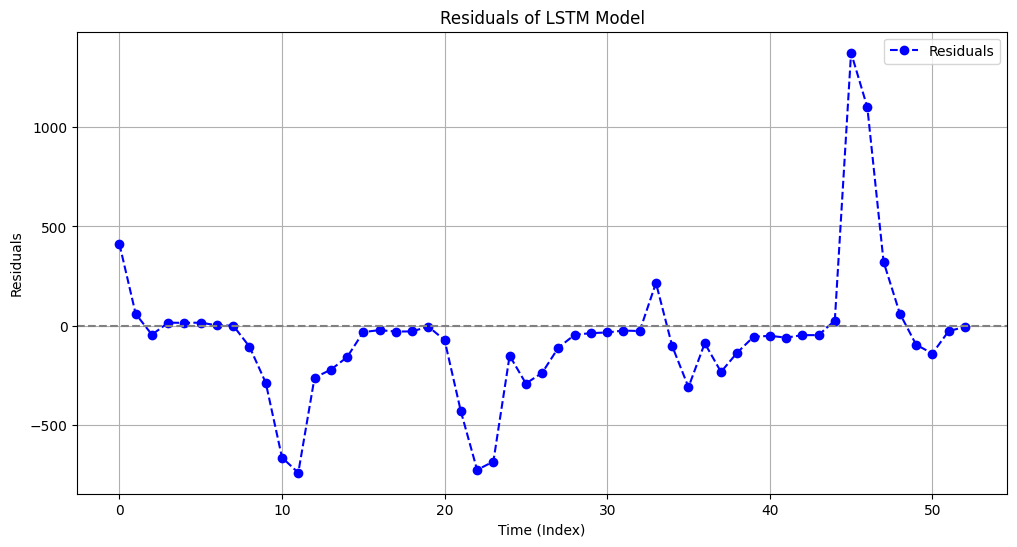

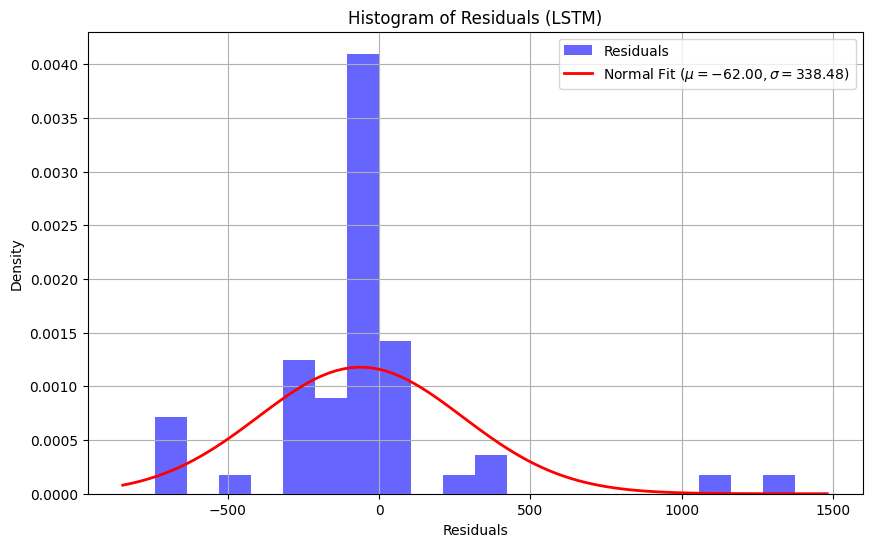

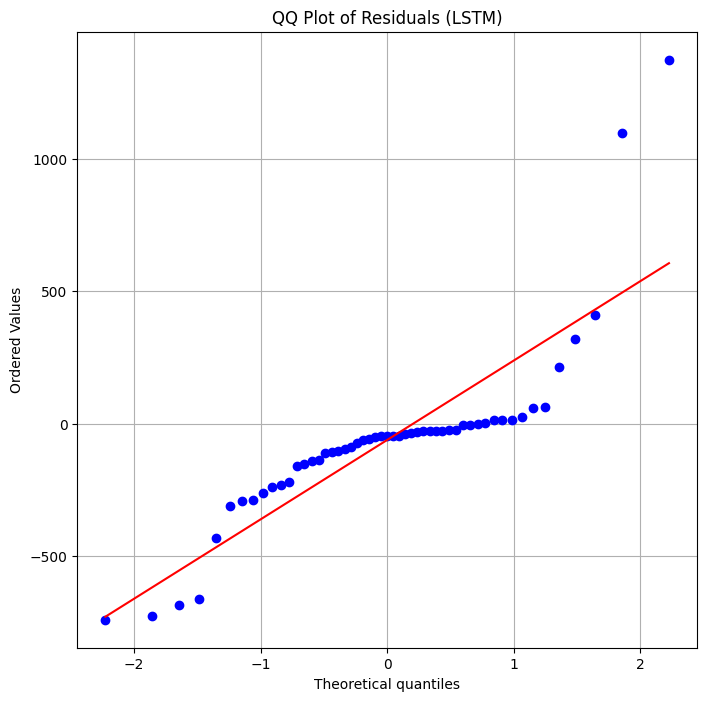

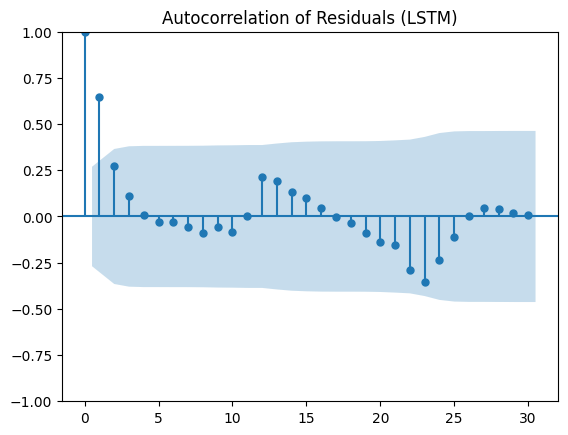

In [49]:
from scipy.stats import norm, probplot
from statsmodels.graphics.tsaplots import plot_acf
# Residual Analysis for LSTM
residuals_lstm = y_test_rescaled - y_pred_rescaled

# Residuals Plot
plt.figure(figsize=(12, 6))
plt.plot(residuals_lstm, label="Residuals", color="blue", marker="o", linestyle="--")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals of LSTM Model")
plt.xlabel("Time (Index)")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_lstm, bins=20, density=True, alpha=0.6, color="blue", label="Residuals")
mu, std = norm.fit(residuals_lstm)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)")
plt.title("Histogram of Residuals (LSTM)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# QQ Plot
plt.figure(figsize=(8, 8))
probplot(residuals_lstm, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (LSTM)")
plt.grid()
plt.show()

# Autocorrelation Plot
plot_acf(residuals_lstm, lags=30, alpha=0.05)
plt.title("Autocorrelation of Residuals (LSTM)")
plt.show()


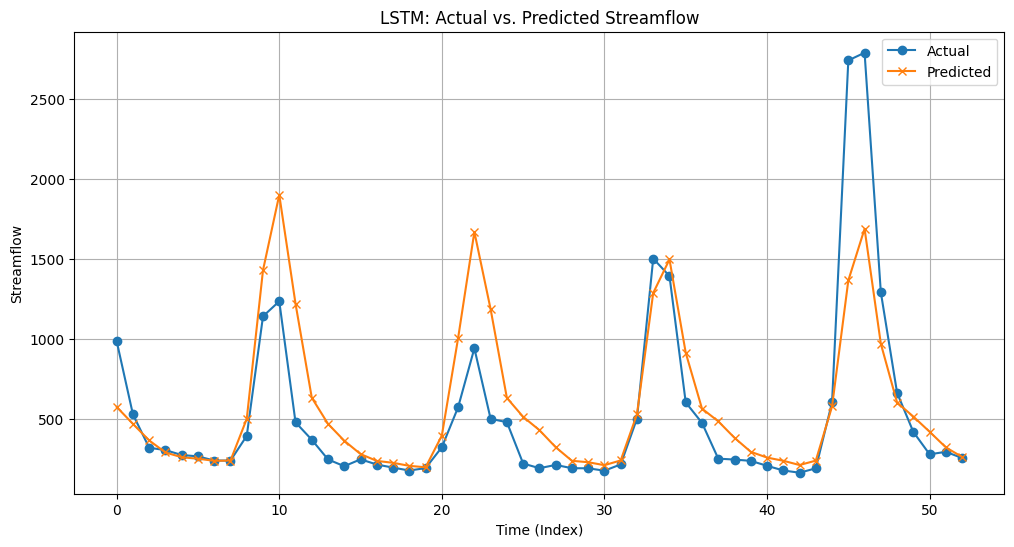

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual', marker='o')
plt.plot(y_pred_rescaled, label='Predicted', marker='x')
plt.legend()
plt.title('LSTM: Actual vs. Predicted Streamflow')
plt.xlabel('Time (Index)')
plt.ylabel('Streamflow')
plt.grid()
plt.show()


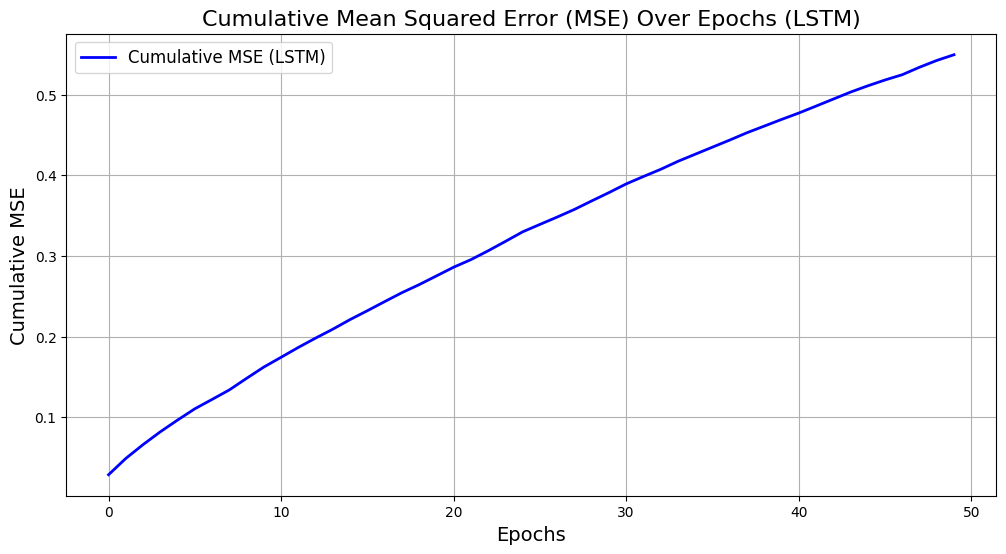

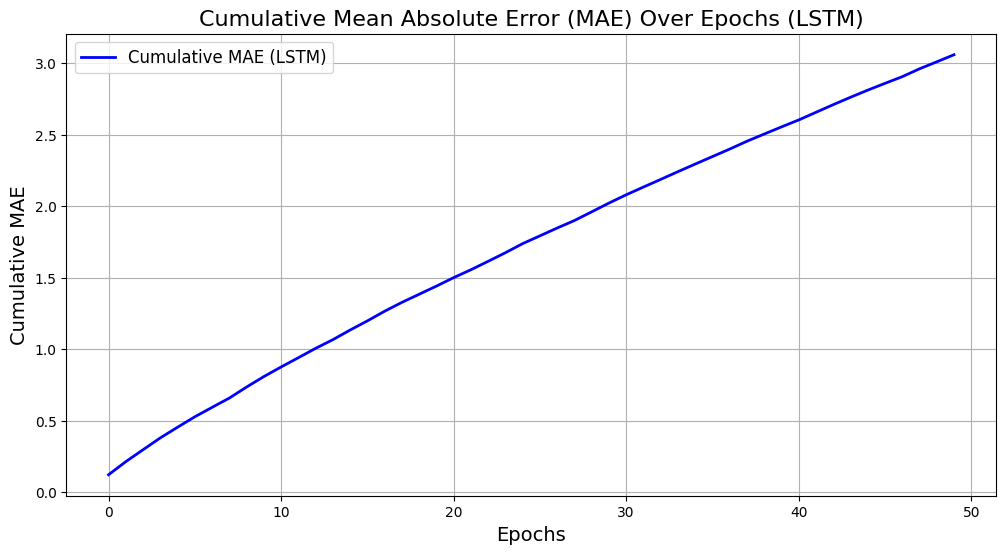

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Extract MSE loss and MAE for each epoch from the history object
epoch_loss = history.history['loss']  # MSE at each epoch
epoch_mae = history.history['mae']   # MAE at each epoch

# Calculate cumulative MSE and MAE over epochs
cumulative_mse = np.cumsum(epoch_loss)
cumulative_mae = np.cumsum(epoch_mae)

# Plot cumulative MSE over epochs
plt.figure(figsize=(12, 6))
plt.plot(cumulative_mse, label='Cumulative MSE (LSTM)', color='blue', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cumulative MSE', fontsize=14)
plt.title('Cumulative Mean Squared Error (MSE) Over Epochs (LSTM)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot cumulative MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(cumulative_mae, label='Cumulative MAE (LSTM)', color='blue', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cumulative MAE', fontsize=14)
plt.title('Cumulative Mean Absolute Error (MAE) Over Epochs (LSTM)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [55]:
# Rescale the predictions and target back to the original scale
lstm_predictions_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_predictions), X_train.shape[2])), lstm_predictions.reshape(-1, 1)])
)[:, -1]

y_train_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_train), X_train.shape[2])), y_train.reshape(-1, 1)])
)[:, -1]

# Compute residuals in the original scale
lstm_residuals_rescaled = y_train_rescaled - lstm_predictions_rescaled

# Compute cumulative MAE and MSE in the original scale
cumulative_lstm_mae_rescaled = np.cumsum(np.abs(lstm_residuals_rescaled)) / np.arange(1, len(lstm_residuals_rescaled) + 1)
cumulative_lstm_mse_rescaled = np.cumsum(lstm_residuals_rescaled ** 2) / np.arange(1, len(lstm_residuals_rescaled) + 1)

# Plot LSTM cumulative MSE in original scale
plt.figure(figsize=(12, 6))
plt.plot(cumulative_lstm_mse_rescaled, label='Cumulative MSE (LSTM)', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MSE', fontsize=14)
plt.title('Cumulative Mean Squared Error (MSE) Over Samples (LSTM)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot LSTM cumulative MAE in original scale
plt.figure(figsize=(12, 6))
plt.plot(cumulative_lstm_mae_rescaled, label='Cumulative MAE (LSTM)', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MAE', fontsize=14)
plt.title('Cumulative Mean Absolute Error (MAE) Over Samples (LSTM)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()



NameError: name 'lstm_predictions' is not defined

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Residual RMSE: 343.82


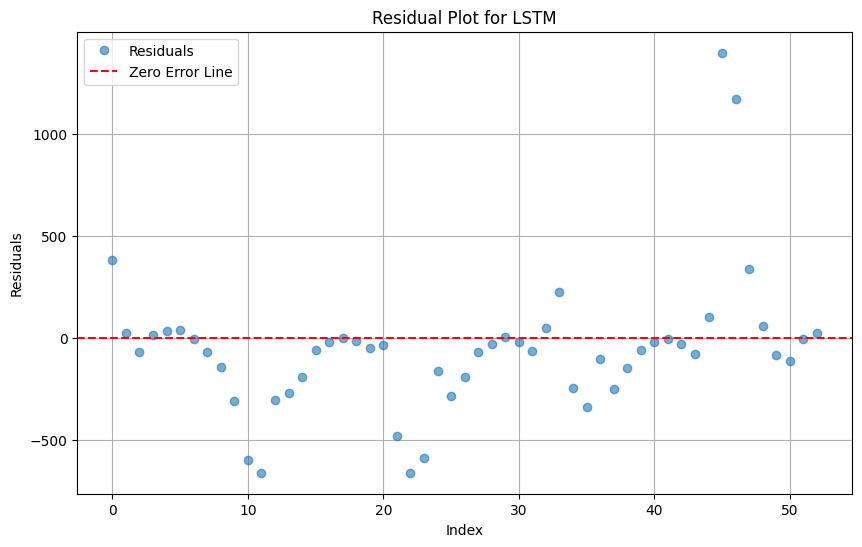

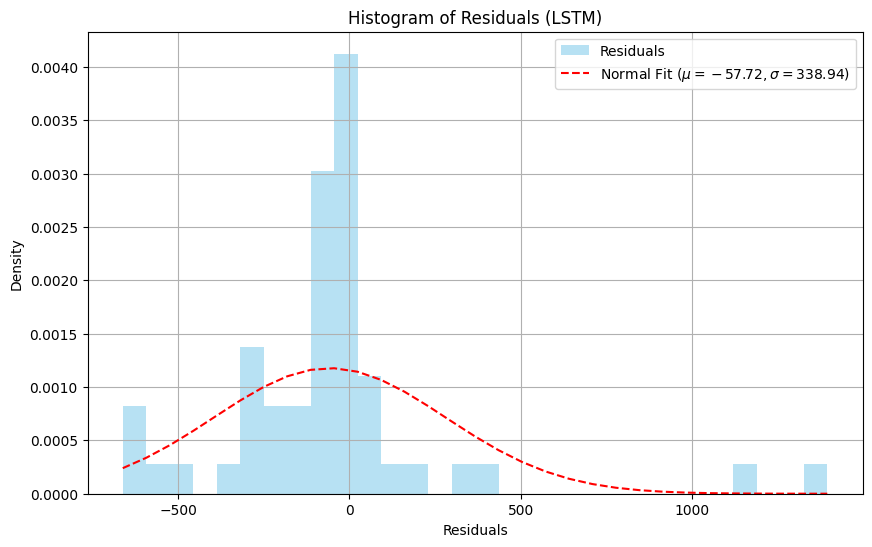

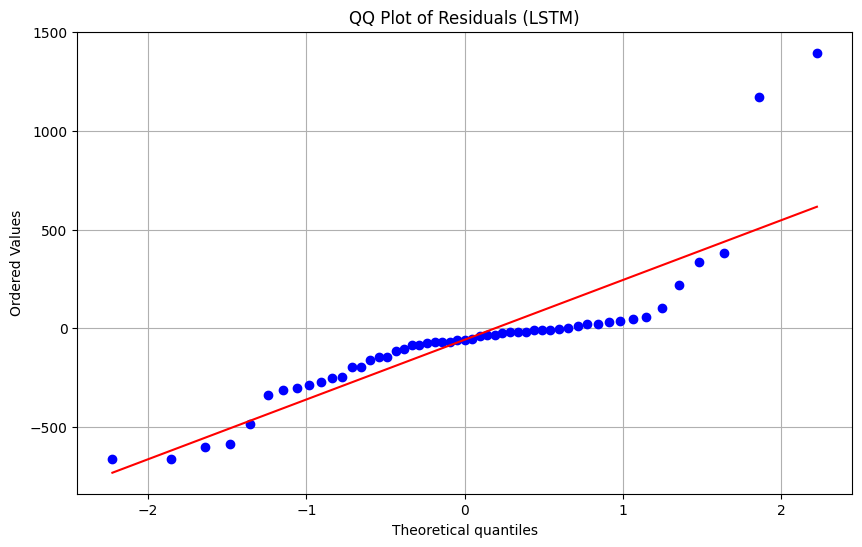

<Figure size 1000x600 with 0 Axes>

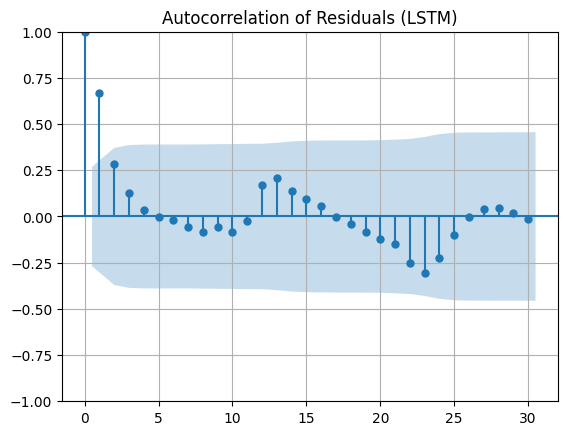

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import norm, probplot
from statsmodels.graphics.tsaplots import plot_acf

# Predict on the test set
y_pred_lstm = model.predict(X_test)

# Reverse scaling of predictions (if required)
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_pred_lstm), X_test.shape[2])), y_pred_lstm])
)[:, -1]

y_test_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), X_test.shape[2])), y_test.reshape(-1, 1)])
)[:, -1]

# Calculate residuals
residuals = y_test_rescaled - y_pred_rescaled

# Residual RMSE
residual_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Residual RMSE: {residual_rmse:.2f}")

# Residual Plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple", marker="o", linestyle="--")
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title("Residual Plot for LSTM")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(residuals, bins=30, density=True, alpha=0.6, color='skyblue', label="Residuals")
mu, std = norm.fit(residuals)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'r--', label=f"Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)")
plt.title("Histogram of Residuals (LSTM)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# QQ Plot
plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (LSTM)")
plt.grid()
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals (LSTM)")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import shap

# Define TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store results for each fold
rmse_scores = []
mae_scores = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split the data
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # Build LSTM model for each fold
    model = Sequential([
        LSTM(256, activation='relu', input_shape=(look_back, X_train_fold.shape[2])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Single output for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    model.fit(
        X_train_fold, y_train_fold,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )

    # Predict on the validation set
    y_pred_fold = model.predict(X_val_fold)

    # Reverse scaling of predictions (if needed)
    y_pred_rescaled = scaler.inverse_transform(
        np.hstack([np.zeros((len(y_pred_fold), X_val_fold.shape[2])), y_pred_fold])
    )[:, -1]

    y_val_rescaled = scaler.inverse_transform(
        np.hstack([np.zeros((len(y_val_fold), X_val_fold.shape[2])), y_val_fold.reshape(-1, 1)])
    )[:, -1]

    # Calculate metrics for the current fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_rescaled, y_pred_rescaled))
    mae_fold = mean_absolute_error(y_val_rescaled, y_pred_rescaled)

    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)

    print(f"Fold {fold+1} RMSE: {rmse_fold:.2f}, MAE: {mae_fold:.2f}")

# Print average cross-validation results
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"Average MAE: {np.mean(mae_scores):.2f}")


Fold 1/5
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - loss: 0.0748 - mae: 0.2094 - val_loss: 0.0092 - val_mae: 0.0604
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0374 - mae: 0.1382 - val_loss: 0.0090 - val_mae: 0.0692
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0310 - mae: 0.1221 - val_loss: 0.0393 - val_mae: 0.1851
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0235 - mae: 0.1308 - val_loss: 0.0128 - val_mae: 0.0890
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0264 - mae: 0.1036 - val_loss: 0.0080 - val_mae: 0.0620
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0270 - mae: 0.0992 - val_loss: 0.0107 - val_mae: 0.0762
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0182 - mae: 0.0918 - val_loss: 0.0207 - val_mae: 0.1224
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0204 - mae: 0.1029 - val_loss: 0.0179 - val_mae: 0.1060
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0129 - mae: 0.0793 - val_loss: 

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Fold 1 RMSE: 359.89, MAE: 223.37
Fold 2/5
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0367 - mae: 0.1417 - val_loss: 0.0253 - val_mae: 0.0859
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0119 - mae: 0.0719 - val_loss: 0.0221 - val_mae: 0.1001
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0176 - mae: 0.0916 - val_loss: 0.0201 - val_mae: 0.0680
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0149 - mae: 0.0760 - val_loss: 0.0193 - val_mae: 0.0659
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mae: 0.0660 - val_loss: 0.0184 - val_mae: 0.0686
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0157 - mae: 0.0811 - val_loss: 0.0201 - val_mae: 0.0601
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - mae: 0.0707 - val_loss: 0.0194 - val_mae: 0.0593
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0149 - mae: 0.0677 - val_loss: 0.0166 - val_mae: 0.0685
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0096 - mae: 0.0623 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0655 - mae: 0.1861 - val_loss: 0.0144 - val_mae: 0.0892
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0190 - mae: 0.0929 - val_loss: 0.0195 - val_mae: 0.1037
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0206 - mae: 0.1007 - val_loss: 0.0137 - val_mae: 0.0796
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0207 - mae: 0.0912 - val_loss: 0.0122 - val_mae: 0.0718
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mae: 0.0757 - val_loss: 0.0158 - val_mae: 0.0896
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0178 - mae: 0.0821 - val_loss: 0.0144 - val_mae: 0.0834
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0150 - mae: 0.0824 - val_loss: 0.0110 - val_mae: 0.0611
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0194 - mae: 0.0802 - val_loss: 0.0115 - val_mae: 0.0666
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0181 - mae: 0.0830 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0401 - mae: 0.1440 - val_loss: 0.0213 - val_mae: 0.1275
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mae: 0.1066 - val_loss: 0.0130 - val_mae: 0.0773
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0155 - mae: 0.0795 - val_loss: 0.0109 - val_mae: 0.0608
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0149 - mae: 0.0710 - val_loss: 0.0126 - val_mae: 0.0754
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0149 - mae: 0.0778 - val_loss: 0.0101 - val_mae: 0.0609
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0111 - mae: 0.0674 - val_loss: 0.0091 - val_mae: 0.0553
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0101 - mae: 0.0616 - val_loss: 0.0090 - val_mae: 0.0522
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0116 - mae: 0.0632 - val_loss: 0.0087 - val_mae: 0.0500
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0115 - mae: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0264 - mae: 0.1169 - val_loss: 0.0181 - val_mae: 0.1047
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0192 - mae: 0.0931 - val_loss: 0.0134 - val_mae: 0.0713
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0166 - mae: 0.0877 - val_loss: 0.0198 - val_mae: 0.1175
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0167 - mae: 0.0890 - val_loss: 0.0153 - val_mae: 0.0839
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mae: 0.0715 - val_loss: 0.0116 - val_mae: 0.0601
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mae: 0.0669 - val_loss: 0.0118 - val_mae: 0.0625
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0128 - mae: 0.0692 - val_loss: 0.0133 - val_mae: 0.0801
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0111 - mae: 0.0660 - val_loss: 0.0146 - val_mae: 0.0791
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0128 - mae: 0.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to compute permutation importance
def permutation_importance(model, X, y, baseline_rmse, look_back):
    feature_importance = []
    for feature_idx in range(X.shape[2]):  # Iterate over features
        X_permuted = X.copy()
        # Permute one feature at a time across the entire sequence
        X_permuted[:, :, feature_idx] = np.random.permutation(X_permuted[:, :, feature_idx])

        # Predict with the permuted data
        y_pred = model.predict(X_permuted)

        # Compute RMSE with permuted data
        rmse_permuted = np.sqrt(mean_squared_error(y, y_pred))

        # Calculate importance as the increase in RMSE
        importance = rmse_permuted - baseline_rmse
        feature_importance.append((features[feature_idx], importance))

    return sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Compute baseline RMSE on test set
y_pred = model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, baseline_rmse, look_back)

# Print top 20 important features
print("Top 20 Important Features:")
for feature, importance in perm_importance[:20]:
    print(f"{feature}: {importance:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━

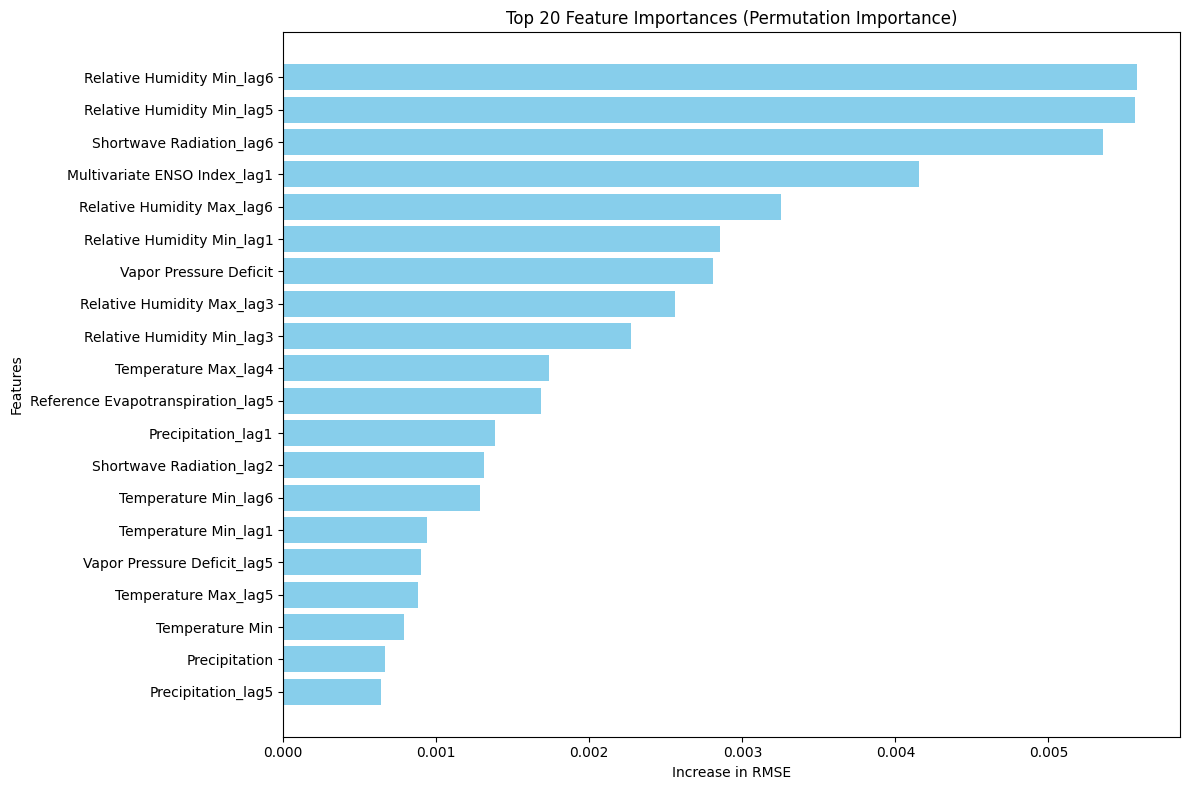

In [ ]:
import matplotlib.pyplot as plt

# Compute baseline RMSE on test set
y_pred = model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, baseline_rmse, look_back)

# Extract the top 20 features and their importance values
top_20_features = perm_importance[:20]
feature_names = [item[0] for item in top_20_features]
importance_values = [item[1] for item in top_20_features]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel('Increase in RMSE')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Define predictors and target
predictors = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed',
    'Multivariate ENSO Index', 'Month_sin', 'Month_cos'
] + [
    f'{col}_lag{n}' for col in [
        'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
        'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
        'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
    ] for n in range(1, 7)
]

target = 'Streamflow_6M_Target'
split_index = int(len(df) * 0.9)

# Split data into features and target
X = df[predictors]
y = df[target]

# Split into training and testing sets
X_train = df.iloc[:split_index][predictors]
y_train = df.iloc[:split_index][target]
X_test = df.iloc[split_index:][predictors]
y_test = df.iloc[split_index:][target]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: X={X_train_scaled.shape}, y={y_train.shape}")
print(f"Testing set: X={X_test_scaled.shape}, y={y_test.shape}")


Training set: X=(475, 72), y=(475,)
Testing set: X=(53, 72), y=(53,)


In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=1000,          # Number of trees
    learning_rate=0.01,         # Step size shrinkage
    max_depth=6,                # Maximum depth of trees
    subsample=0.8,              # Row sampling ratio
    colsample_bytree=0.8,       # Feature sampling ratio
    random_state=42             # For reproducibility
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")


Test RMSE: 503.3092200051011
Test MAE: 288.75180433741156


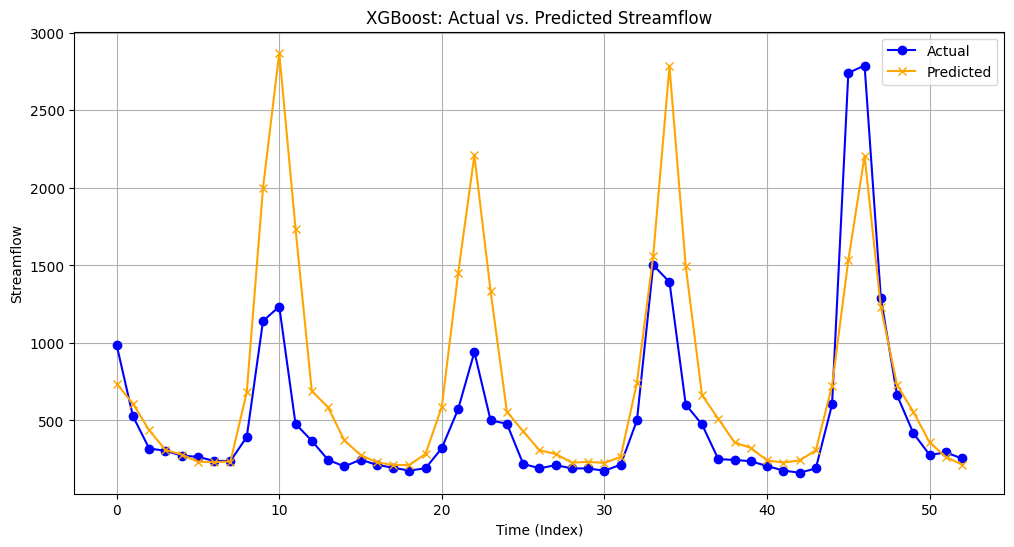

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='orange')
plt.legend()
plt.title('XGBoost: Actual vs. Predicted Streamflow')
plt.xlabel('Time (Index)')
plt.ylabel('Streamflow')
plt.grid()
plt.show()


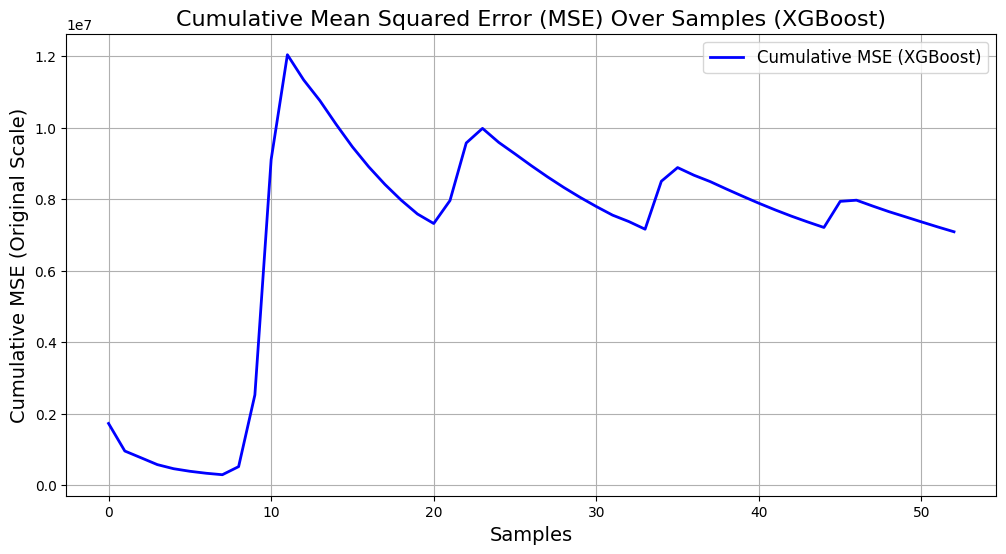

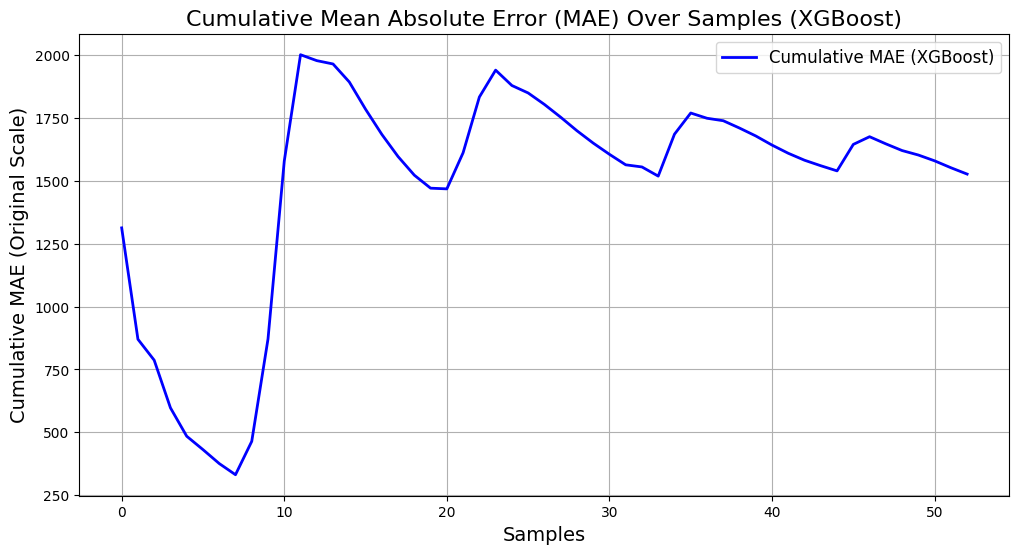

In [ ]:
# Ensure proper number of columns for inverse transformation
num_features = scaler.n_features_in_  # Get the number of features originally scaled

# Create padded arrays for inverse transformation
y_pred_padded = np.hstack([np.zeros((len(y_pred), num_features - 1)), y_pred.reshape(-1, 1)])
y_test_padded = np.hstack([np.zeros((len(y_test), num_features - 1)), y_test.values.reshape(-1, 1)])

# Apply inverse transformation
y_pred_rescaled = scaler.inverse_transform(y_pred_padded)[:, -1]
y_test_rescaled = scaler.inverse_transform(y_test_padded)[:, -1]

# Compute residuals in the original scale
xgb_residuals = y_test_rescaled - y_pred_rescaled

# Compute cumulative MAE and MSE
cumulative_xgb_mae = np.cumsum(np.abs(xgb_residuals)) / np.arange(1, len(xgb_residuals) + 1)
cumulative_xgb_mse = np.cumsum(xgb_residuals ** 2) / np.arange(1, len(xgb_residuals) + 1)

# Plot XGBoost cumulative MSE
plt.figure(figsize=(12, 6))
plt.plot(cumulative_xgb_mse, label='Cumulative MSE (XGBoost)', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MSE (Original Scale)', fontsize=14)
plt.title('Cumulative Mean Squared Error (MSE) Over Samples (XGBoost)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot XGBoost cumulative MAE
plt.figure(figsize=(12, 6))
plt.plot(cumulative_xgb_mae, label='Cumulative MAE (XGBoost)', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MAE (Original Scale)', fontsize=14)
plt.title('Cumulative Mean Absolute Error (MAE) Over Samples (XGBoost)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


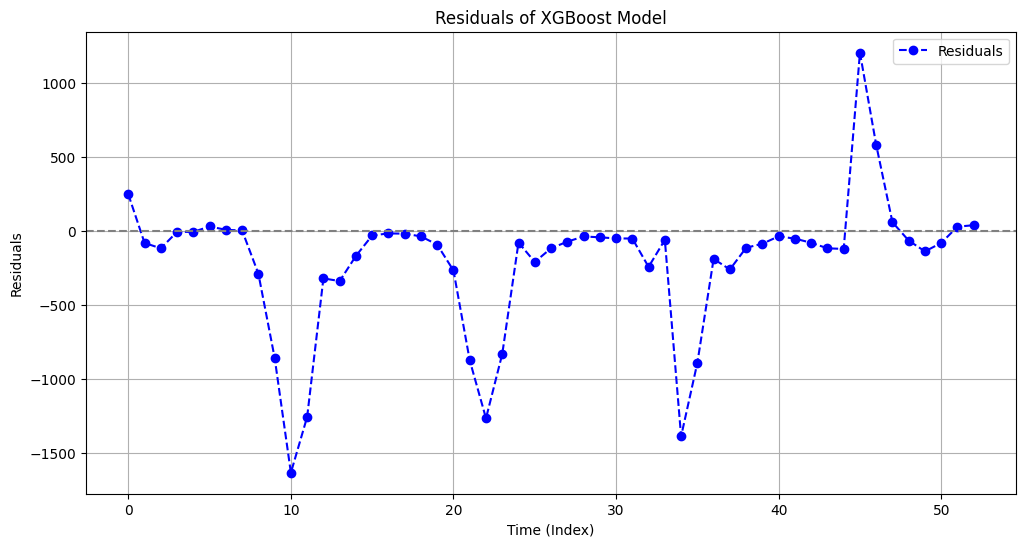

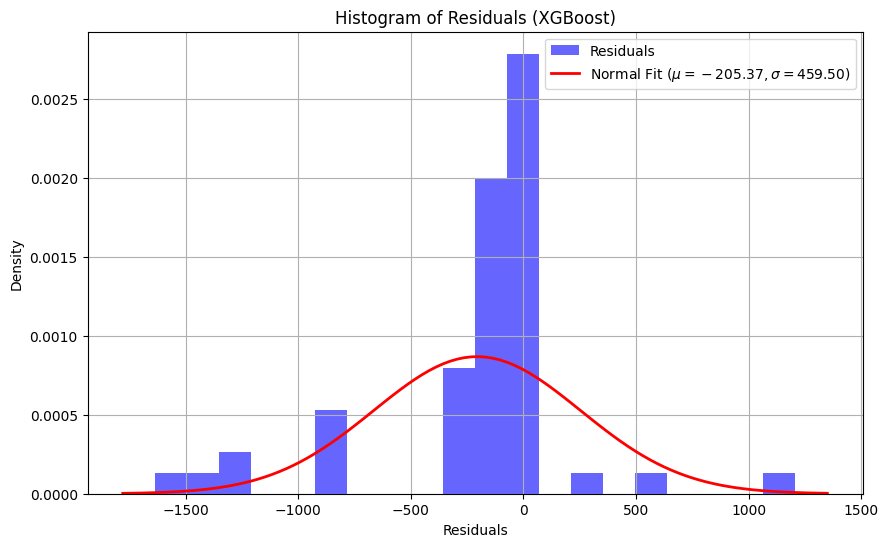

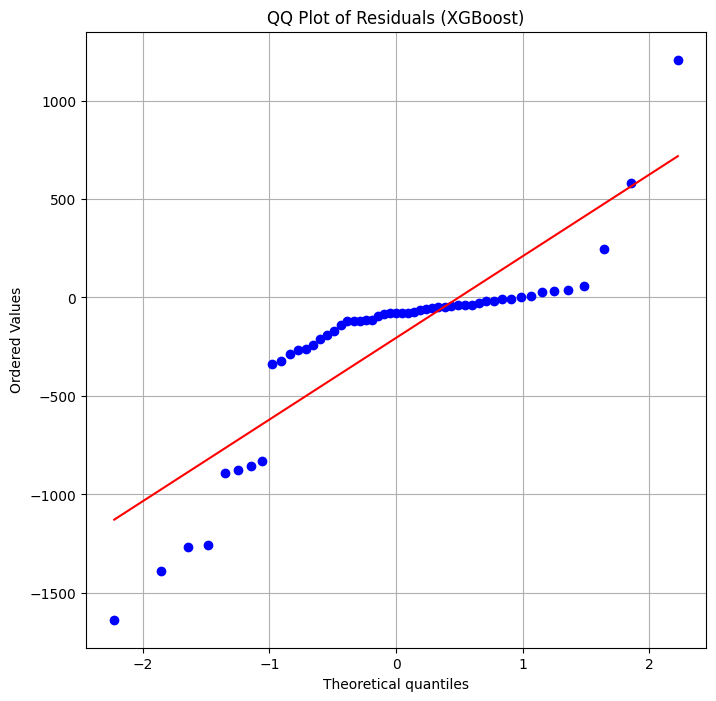

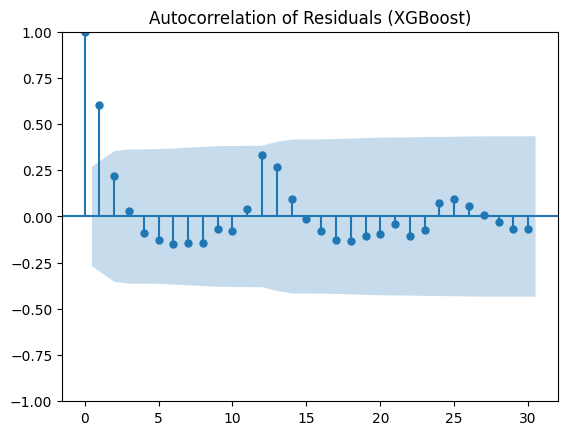

In [ ]:
# Residual Analysis for XGBoost
residuals_xgb = y_test.values - y_pred

# Residuals Plot
plt.figure(figsize=(12, 6))
plt.plot(residuals_xgb, label="Residuals", color="blue", marker="o", linestyle="--")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals of XGBoost Model")
plt.xlabel("Time (Index)")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_xgb, bins=20, density=True, alpha=0.6, color="blue", label="Residuals")
mu, std = norm.fit(residuals_xgb)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)")
plt.title("Histogram of Residuals (XGBoost)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# QQ Plot
plt.figure(figsize=(8, 8))
probplot(residuals_xgb, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (XGBoost)")
plt.grid()
plt.show()

# Autocorrelation Plot
plot_acf(residuals_xgb, lags=30, alpha=0.05)
plt.title("Autocorrelation of Residuals (XGBoost)")
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse = []
cv_mae = []

for train_idx, val_idx in kf.split(X_train_scaled):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the XGBoost model
    xgb_model = XGBRegressor(
        n_estimators=1000, learning_rate=0.01, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    )
    xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_val_pred = xgb_model.predict(X_val_fold)

    # Calculate RMSE and MAE for the fold
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)

    cv_rmse.append(fold_rmse)
    cv_mae.append(fold_mae)

# Calculate average RMSE and MAE across folds
avg_rmse = np.mean(cv_rmse)
avg_mae = np.mean(cv_mae)

print(f"Cross-Validation Average RMSE: {avg_rmse}")
print(f"Cross-Validation Average MAE: {avg_mae}")


Cross-Validation Average RMSE: 467.277019523312
Cross-Validation Average MAE: 250.27801779656662


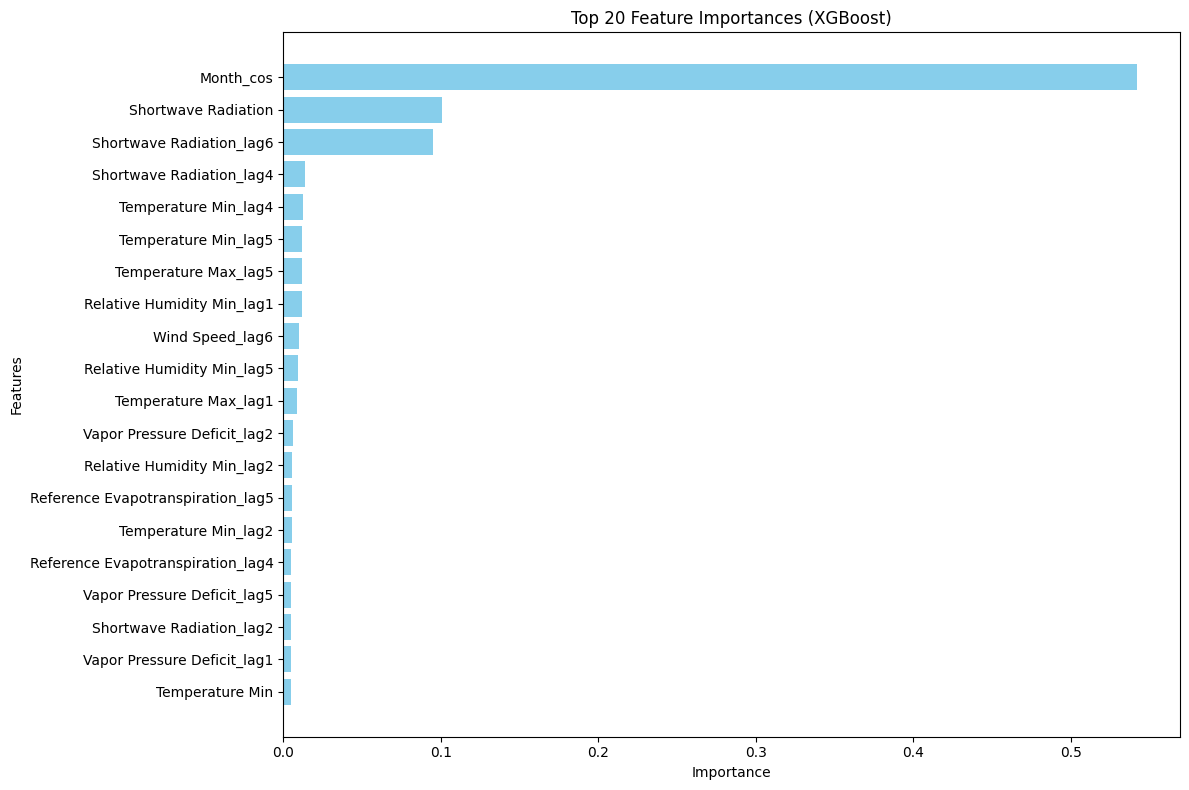

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to associate feature names with their importance
feature_importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


# Random Forest Regression Approach

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define predictors and target
predictors = [
    'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
    'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
    'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed',
    'Multivariate ENSO Index', 'Month_sin', 'Month_cos'
] + [
    f'{col}_lag{n}' for col in [
        'Precipitation', 'Reference Evapotranspiration', 'Relative Humidity Max',
        'Relative Humidity Min', 'Shortwave Radiation', 'Temperature Max',
        'Temperature Min', 'Vapor Pressure Deficit', 'Wind Speed', 'Multivariate ENSO Index'
    ] for n in range(1, 7)
]

target = 'Streamflow_6M_Target'

# Data split (already normalized)
X_train_rfc = X_train_scaled
X_test_rfc = X_test_scaled
y_train_rfc = y_train
y_test_rfc = y_test


In [ ]:
# Initialize the RFR model with the best parameters
optimized_rfr = RandomForestRegressor(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Train the model
optimized_rfr.fit(X_train_rfc, y_train_rfc)


RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred_optimized_rfr = optimized_rfr.predict(X_test_rfc)

# Calculate RMSE and MAE
rmse_optimized_rfr = np.sqrt(mean_squared_error(y_test_rfc, y_pred_optimized_rfr))
mae_optimized_rfr = mean_absolute_error(y_test_rfc, y_pred_optimized_rfr)

print(f"Tuned Test RMSE: {rmse_optimized_rfr}")
print(f"Tuned Test MAE: {mae_optimized_rfr}")


Tuned Test RMSE: 427.2196575564023
Tuned Test MAE: 263.4097216701036


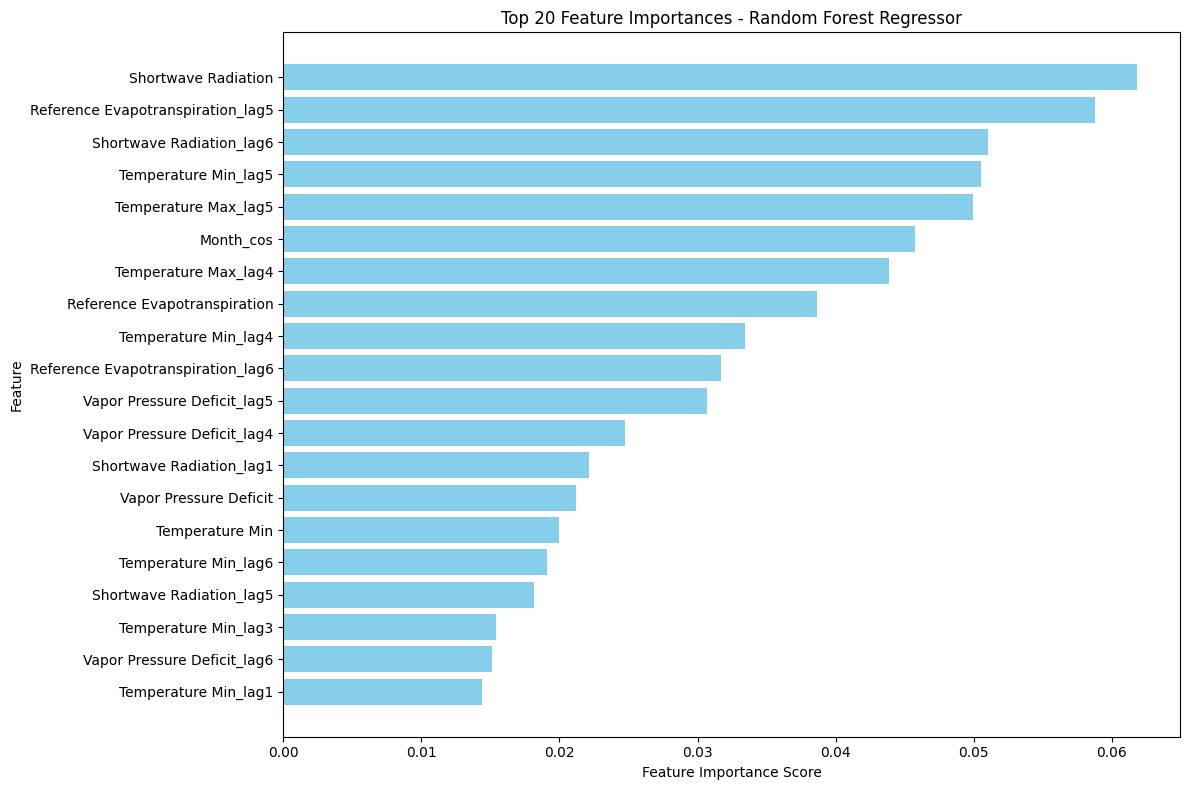

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = optimized_rfr.feature_importances_

# Create a DataFrame to pair feature names with their importance scores
importances_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'][:20], importances_df['Importance'][:20], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - Random Forest Regressor')
plt.gca().invert_yaxis()  # Reverse the order of features for better readability
plt.tight_layout()
plt.show()


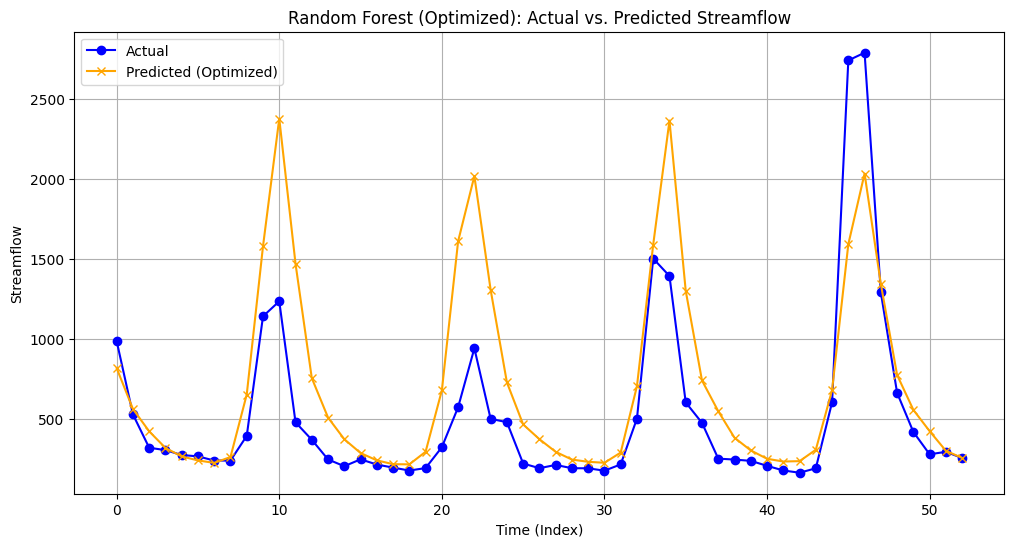

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rfc.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred_optimized_rfr, label='Predicted (Optimized)', marker='x', color='orange')
plt.legend()
plt.title('Random Forest (Optimized): Actual vs. Predicted Streamflow')
plt.xlabel('Time (Index)')
plt.ylabel('Streamflow')
plt.grid()
plt.show()


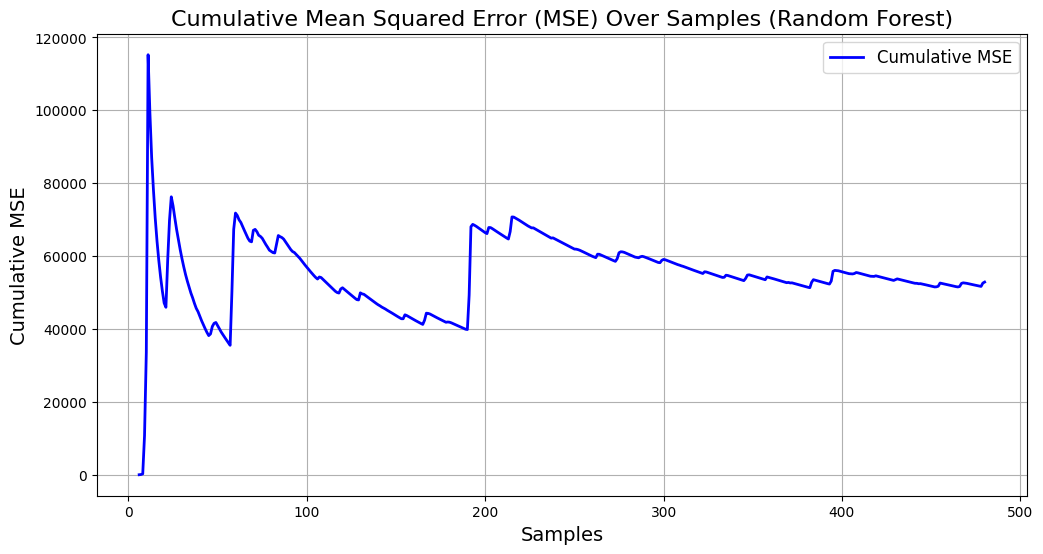

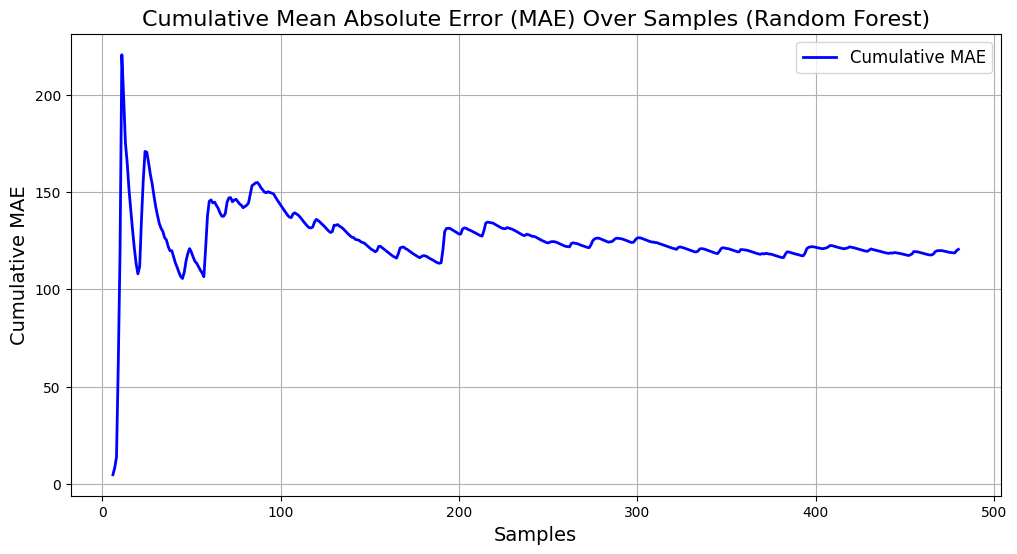

In [ ]:
# Random Forest Loss Function
# Compute residuals for Random Forest model
rfr_residuals = y_train_rfc - optimized_rfr.predict(X_train_rfc)

# Compute cumulative MAE and MSE for Random Forest
cumulative_rfr_mae = np.cumsum(np.abs(rfr_residuals)) / np.arange(1, len(rfr_residuals) + 1)
cumulative_rfr_mse = np.cumsum(rfr_residuals ** 2) / np.arange(1, len(rfr_residuals) + 1)

# Plot Random Forest cumulative MSE
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rfr_mse, label='Cumulative MSE', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MSE', fontsize=14)
plt.title('Cumulative Mean Squared Error (MSE) Over Samples (Random Forest)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot Random Forest cumulative MAE
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rfr_mae, label='Cumulative MAE', color='blue', linewidth=2)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative MAE', fontsize=14)
plt.title('Cumulative Mean Absolute Error (MAE) Over Samples (Random Forest)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse = []
cv_mae = []

for train_idx, val_idx in kf.split(X_train_rfc):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_rfc[train_idx], X_train_rfc[val_idx]
    y_train_fold, y_val_fold = y_train_rfc.iloc[train_idx], y_train_rfc.iloc[val_idx]

    # Train the Random Forest model
    rfr_model = RandomForestRegressor(
        max_depth=10,
        max_features='log2',
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=200,
        random_state=42
    )
    rfr_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_val_pred = rfr_model.predict(X_val_fold)

    # Calculate RMSE and MAE for the fold
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)

    cv_rmse.append(fold_rmse)
    cv_mae.append(fold_mae)

# Calculate average RMSE and MAE across folds
avg_rmse = np.mean(cv_rmse)
avg_mae = np.mean(cv_mae)

print(f"Cross-Validation Average RMSE: {avg_rmse}")
print(f"Cross-Validation Average MAE: {avg_mae}")


Cross-Validation Average RMSE: 456.94157572956567
Cross-Validation Average MAE: 250.35970060843306


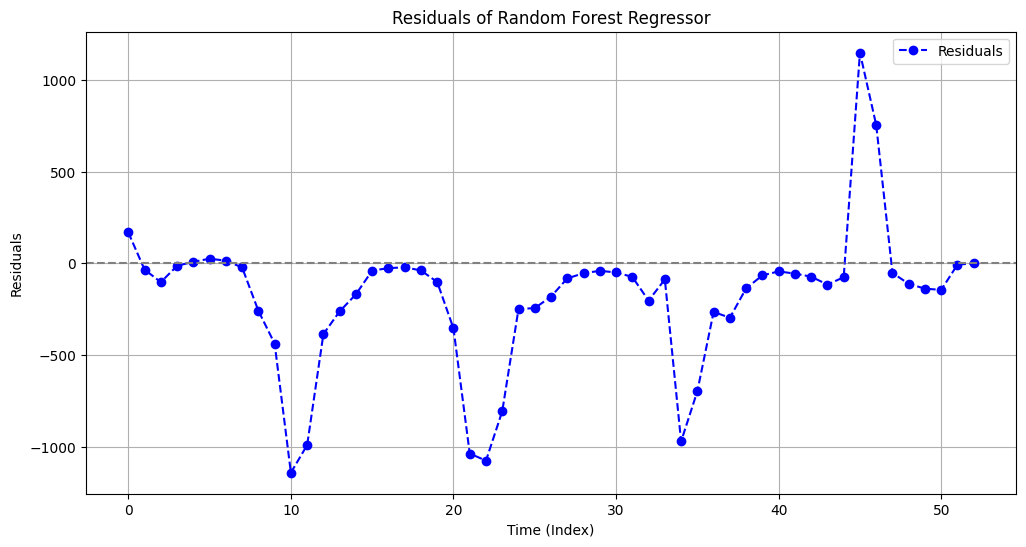

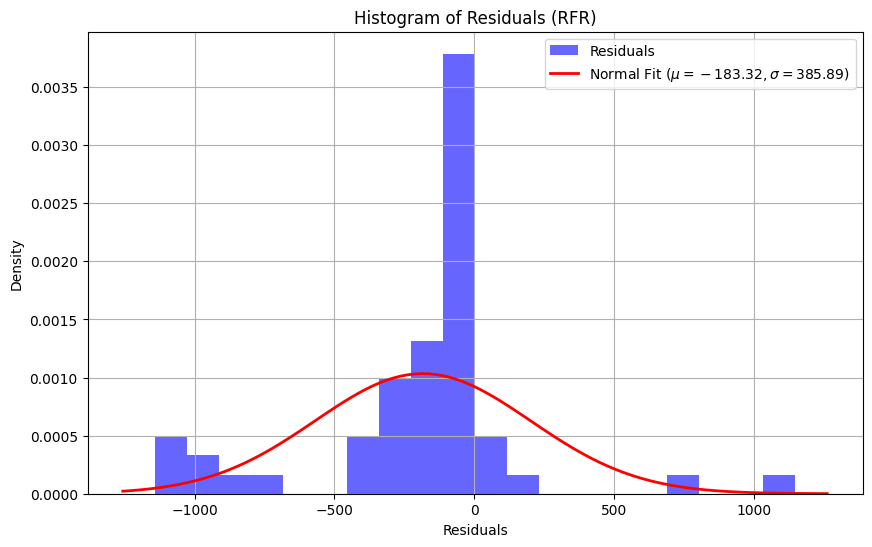

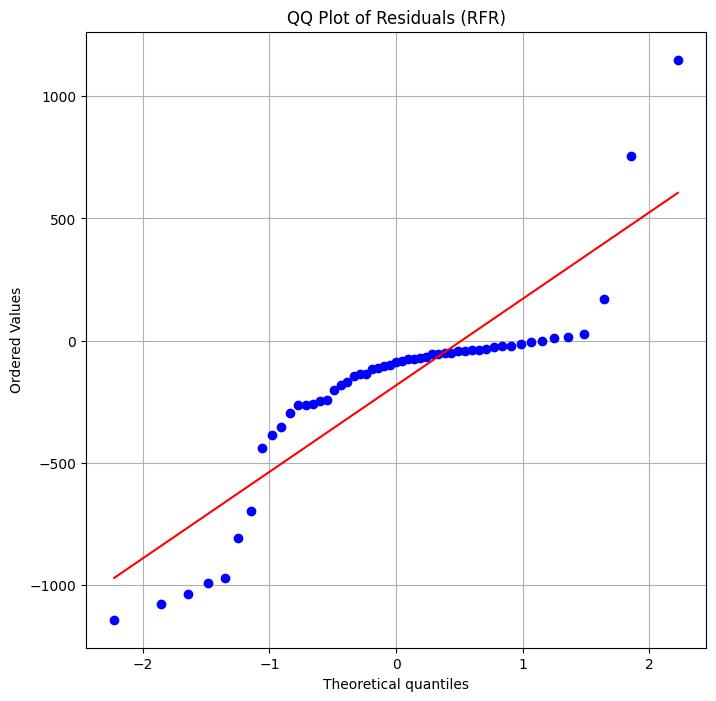

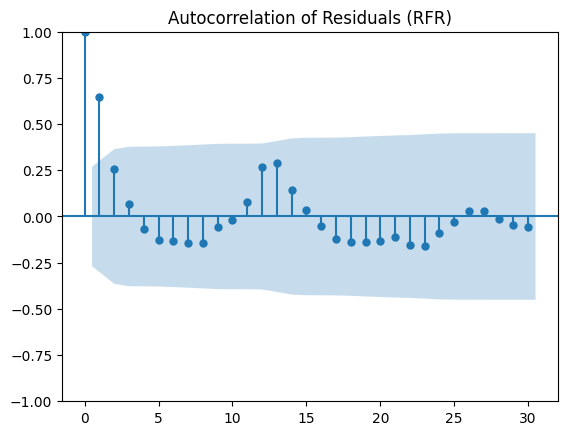

In [ ]:
# Residual Analysis for RFR
residuals_rfr = y_test_rfc.values - y_pred_optimized_rfr

# Residuals Plot
plt.figure(figsize=(12, 6))
plt.plot(residuals_rfr, label="Residuals", color="blue", marker="o", linestyle="--")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals of Random Forest Regressor")
plt.xlabel("Time (Index)")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_rfr, bins=20, density=True, alpha=0.6, color="blue", label="Residuals")
mu, std = norm.fit(residuals_rfr)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)")
plt.title("Histogram of Residuals (RFR)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# QQ Plot
plt.figure(figsize=(8, 8))
probplot(residuals_rfr, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (RFR)")
plt.grid()
plt.show()

# Autocorrelation Plot
plot_acf(residuals_rfr, lags=30, alpha=0.05)
plt.title("Autocorrelation of Residuals (RFR)")
plt.show()
